In [1]:
# import the required packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import feature_engine.imputation as mdi
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import MeanEncoder
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans

## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
hrdf = pd.read_csv('./MLasgdata/hr_data.csv')

### Exploring the Dataset

In [3]:
hrdf.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [4]:
hrdf.tail()

employee_id         department     region         education gender  \
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0

In [5]:
hrdf.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Exploring Target Variable (is promoted)

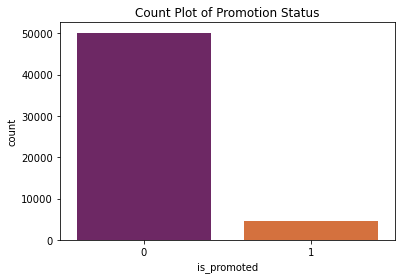

In [6]:
# Count plot for the target variable (is_promoted)
sns.countplot(x='is_promoted', data=hrdf,palette = 'inferno')
plt.title('Count Plot of Promotion Status')
plt.show()

In [7]:
# Calculate the percentage of each class
promoted_percentage = (hrdf['is_promoted'].value_counts() / len(hrdf)) * 100

print("Percentage of Class 0 (Not Promoted): {:.2f}%".format(promoted_percentage[0]))
print("Percentage of Class 1 (Promoted): {:.2f}%".format(promoted_percentage[1]))

#Inbalance distribution, Have to Stratify

Percentage of Class 0 (Not Promoted): 91.48%
Percentage of Class 1 (Promoted): 8.52%


#### Stratified Sampling
This approach is often used to mitigate the impact of class imbalance on machine learning models, especially in situations where one class is significantly underrepresented compared to the other.

In [8]:
hrdf1 = hrdf[hrdf['is_promoted']==1]
hrdf1.head()

employee_id         department     region         education gender  \
11        49017  Sales & Marketing   region_7        Bachelor's      f   
39        58304  Sales & Marketing  region_28        Bachelor's      m   
60        17673  Sales & Marketing   region_4  Master's & above      m   
66        77981            Finance  region_22        Bachelor's      m   
67        16502  Sales & Marketing  region_22        Bachelor's      m   

   recruitment_channel  no_of_trainings  age  previous_year_rating  \
11            sourcing                1   35                   5.0   
39            sourcing                1   33                   5.0   
60               other                1   50                   4.0   
66               other                1   27                   NaN   
67            sourcing                1   27                   NaN   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11                  3              1            0                  50   
39                  6              1            0                  51   
60                 17              1            0                  47   
66                  1              1            1                  58   
67                  1              0            0                  61   

    is_promoted  
11            1  
39            1  
60            1  
66            1  
67            1

In [9]:
hrdf0 = hrdf[hrdf['is_promoted']==0]
hrdf0.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [10]:
hrdf0_sampled = hrdf0.sample(n=len(hrdf1), random_state=2).copy()
hrdf0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           4668 non-null   int64  
 1   department            4668 non-null   object 
 2   region                4668 non-null   object 
 3   education             4438 non-null   object 
 4   gender                4668 non-null   object 
 5   recruitment_channel   4668 non-null   object 
 6   no_of_trainings       4668 non-null   int64  
 7   age                   4668 non-null   int64  
 8   previous_year_rating  4305 non-null   float64
 9   length_of_service     4668 non-null   int64  
 10  KPIs_met >80%         4668 non-null   int64  
 11  awards_won?           4668 non-null   int64  
 12  avg_training_score    4668 non-null   int64  
 13  is_promoted           4668 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [11]:
hrdf_new=pd.concat([hrdf1,hrdf0_sampled],axis=0)
hrdf_new['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [12]:
hrdf_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   object 
 2   region                9336 non-null   object 
 3   education             8984 non-null   object 
 4   gender                9336 non-null   object 
 5   recruitment_channel   9336 non-null   object 
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  8634 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


In [13]:
hrdf_new.describe()

employee_id  no_of_trainings          age  previous_year_rating  \
count   9336.000000      9336.000000  9336.000000           8634.000000   
mean   38869.959940         1.228685    34.596937              3.626940   
std    22642.619782         0.567723     7.449845              1.211617   
min       15.000000         1.000000    20.000000              1.000000   
25%    19135.500000         1.000000    29.000000              3.000000   
50%    38955.500000         1.000000    33.000000              4.000000   
75%    58222.750000         1.000000    38.000000              5.000000   
max    78292.000000         7.000000    60.000000              5.000000   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
count        9336.000000    9336.000000  9336.000000         9336.000000   
mean            5.759533       0.508569     0.066945           67.104863   
std             4.146011       0.499953     0.249940           14.569584   
min             1.000000       0.000000     0.000000           41.000000   
25%             3.000000       0.000000     0.000000           54.000000   
50%             5.000000       1.000000     0.000000           65.000000   
75%             7.000000       1.000000     0.000000           81.000000   
max            34.000000       1.000000     1.000000           99.000000   

       is_promoted  
count  9336.000000  
mean      0.500000  
std       0.500027  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000

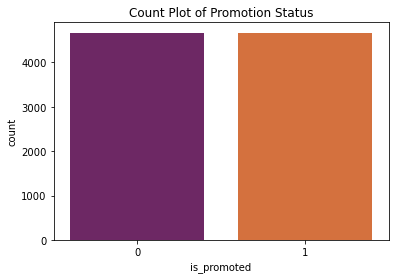

In [14]:
# Count plot for the target variable (is_promoted)
sns.countplot(x='is_promoted', data=hrdf_new,palette = 'inferno')
plt.title('Count Plot of Promotion Status')
plt.show()

### Looking at Missing Data for Each Variable

In [15]:
hrdf_new.isnull().sum()

employee_id               0
department                0
region                    0
education               352
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    702
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

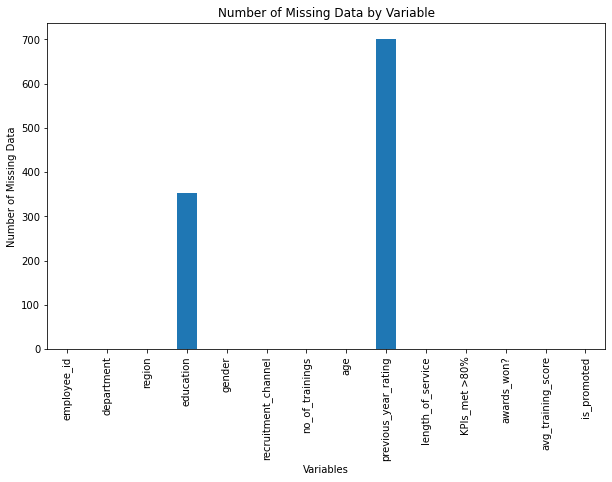

In [16]:
#Visualising missing data
color = []
missing_counts = hrdf_new.isnull().sum()

plt.figure(figsize=(10, 6))  # Set the figure size

missing_counts.plot(kind='bar')


plt.title('Number of Missing Data by Variable')  # Set the title
plt.xlabel('Variables')  # Set the x-axis label
plt.ylabel('Number of Missing Data')  # Set the y-axis label

plt.show()

### Splitting Dataset into Catergorical and Numerical Variables

In [17]:
#find categorical variable
cat_cols = [c for c in hrdf.columns if hrdf_new[c].dtypes=='O']
hrdf_new[cat_cols].isnull().mean().sort_values()

department             0.000000
region                 0.000000
gender                 0.000000
recruitment_channel    0.000000
education              0.037704
dtype: float64

In [18]:
#find numerical variables
num_cols = [c for c in hrdf_new.columns if hrdf[c].dtypes!='O']
hrdf_new[num_cols].isnull().mean().sort_values()

employee_id             0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
previous_year_rating    0.075193
dtype: float64

### Visualizing Categorical Variables

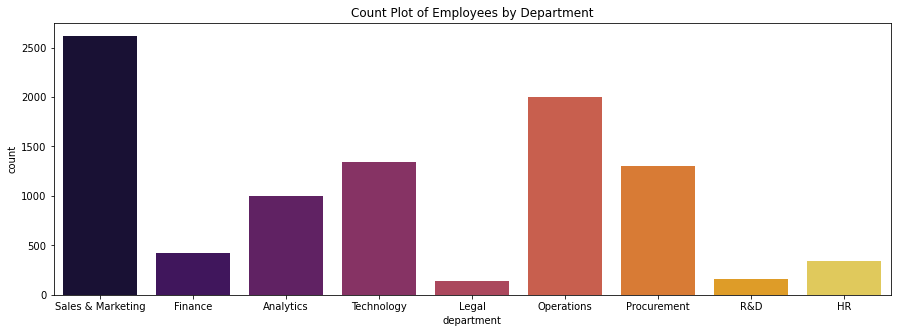

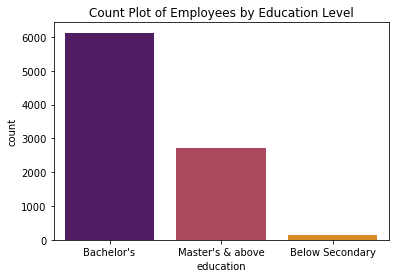

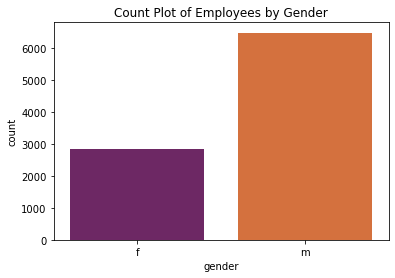

In [19]:

# Count plot for department
plt.figure(figsize=(15, 5))
sns.countplot(x='department', data=hrdf_new,palette = 'inferno')
plt.title('Count Plot of Employees by Department')
plt.show()

# Count plot for education
sns.countplot(x='education', data=hrdf_new,palette = 'inferno')
plt.title('Count Plot of Employees by Education Level')
plt.show()

# Count plot for gender
sns.countplot(x='gender', data=hrdf_new,palette = 'inferno')
plt.title('Count Plot of Employees by Gender')
plt.show()


#### Exploring Relationship Between Target Variable and Categorical Variables

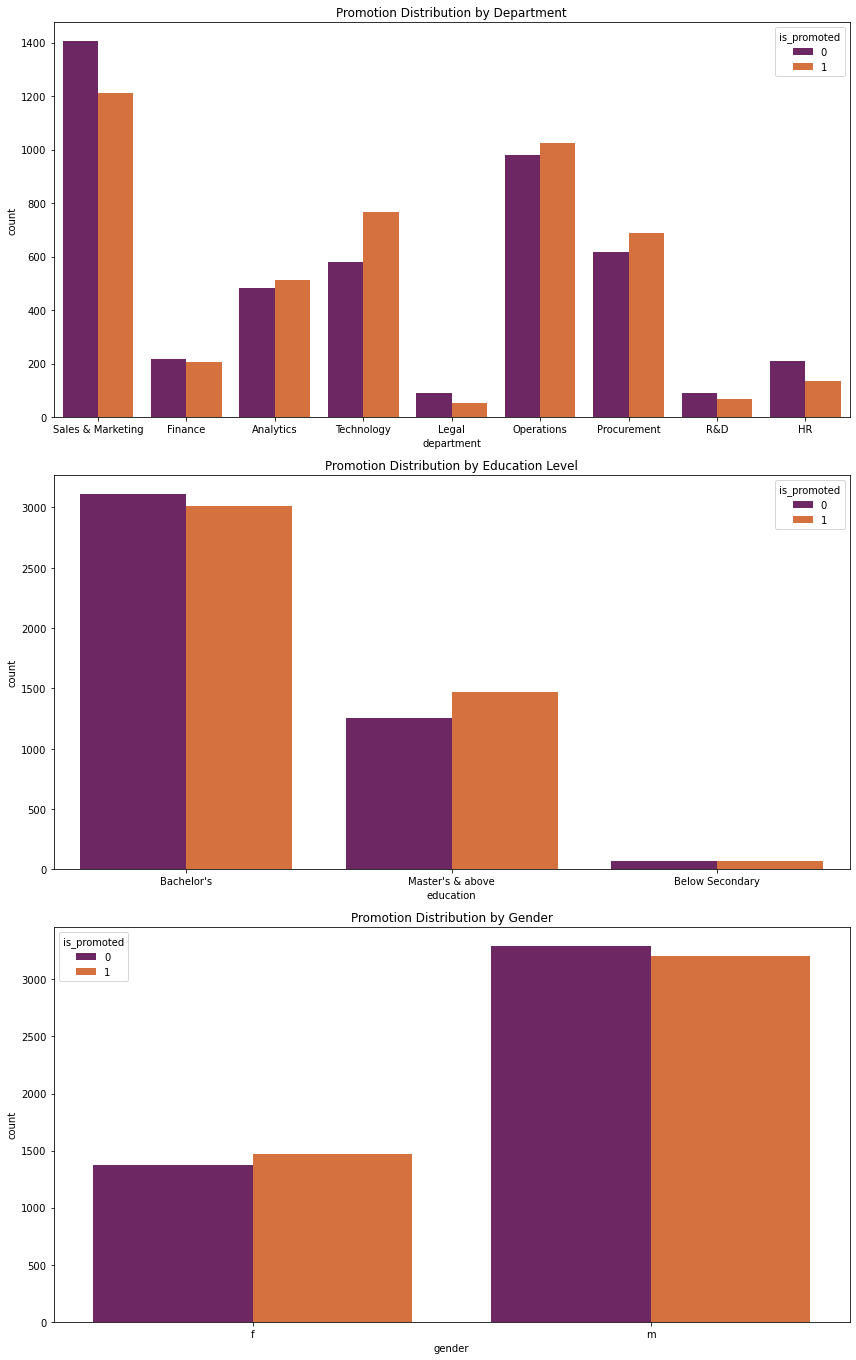

In [20]:
# Set a larger figure size
plt.figure(figsize=(12, 19))

# Count plot for promotions across different departments
plt.subplot(3, 1, 1)
sns.countplot(x='department', hue='is_promoted', data=hrdf_new,palette = 'inferno')
plt.title('Promotion Distribution by Department')

# Count plot for promotions across different education levels
plt.subplot(3, 1, 2)
sns.countplot(x='education', hue='is_promoted', data=hrdf_new,palette = 'inferno')
plt.title('Promotion Distribution by Education Level')

# Count plot for promotions across different genders
plt.subplot(3, 1, 3)
sns.countplot(x='gender', hue='is_promoted', data=hrdf_new,palette = 'inferno')
plt.title('Promotion Distribution by Gender')

# Adjust layout
plt.tight_layout()
plt.show()

##### Chi Square Test

In [21]:
from scipy.stats import chi2_contingency

p_values = {}

# Columns to perform chi-square tests on
columns_to_test = ['department', 'region', 'gender', 'recruitment_channel', 'education']

for column in columns_to_test:
    contingency_table = pd.crosstab(hrdf_new[column], hrdf_new['is_promoted'])
    
    # Perform the chi-square test
    _, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Append the p-value to the dictionary
    p_values[column] = p_value

# Display p-values for all variables
for column, p_value in p_values.items():
    print(f"{column}: p-value: {p_value:.10f}")




department: p-value: 0.0000000000
region: p-value: 0.0000000000
gender: p-value: 0.0406878061
recruitment_channel: p-value: 0.0286367032
education: p-value: 0.0001060389


### Visualizing Outliers in Numerical Variables

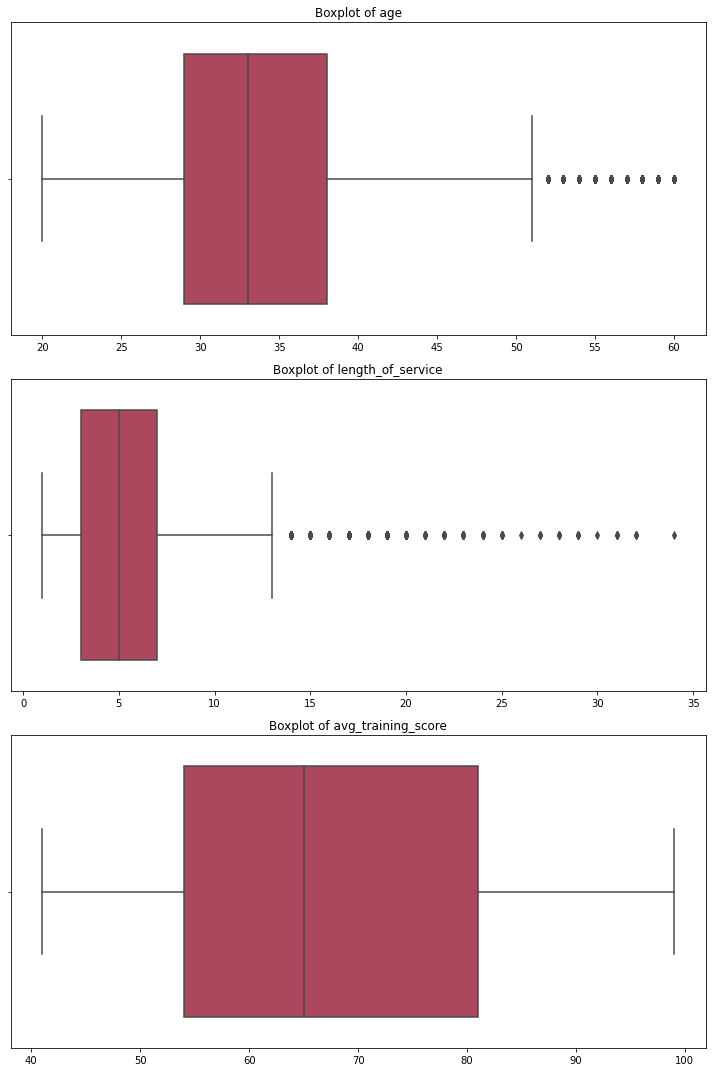

In [22]:

# Selecting numerical variables
numerical_variables = ['age', 'length_of_service', 'avg_training_score']

# Plotting individual vertical boxplots
plt.figure(figsize=(10, 15))

for i, var in enumerate(numerical_variables, 1):
    plt.subplot(len(numerical_variables), 1, i)
    sns.boxplot(x=hrdf_new[var],palette = 'inferno')
    plt.title(f'Boxplot of {var}')
    plt.xlabel('') 

plt.tight_layout()
plt.show()


### Visualizing Distribution of Numerical Variables

In [23]:
def diagnostic_plots(df, variable,color = 'salmon'):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30, color = color)

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    

    plt.show()

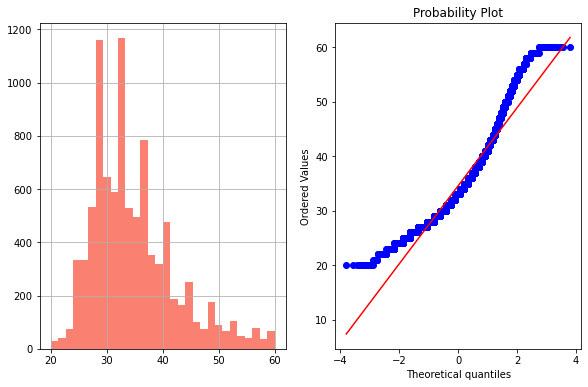

In [24]:
diagnostic_plots(hrdf_new, 'age')

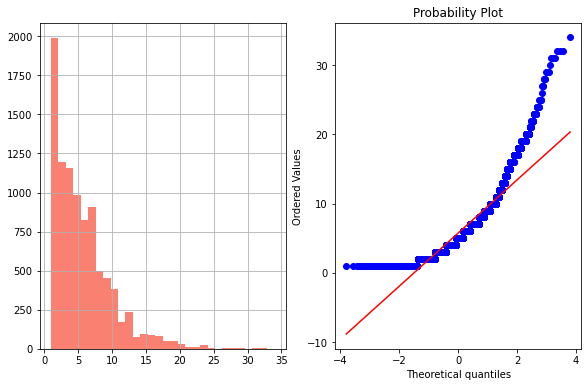

In [25]:
diagnostic_plots(hrdf_new, 'length_of_service')

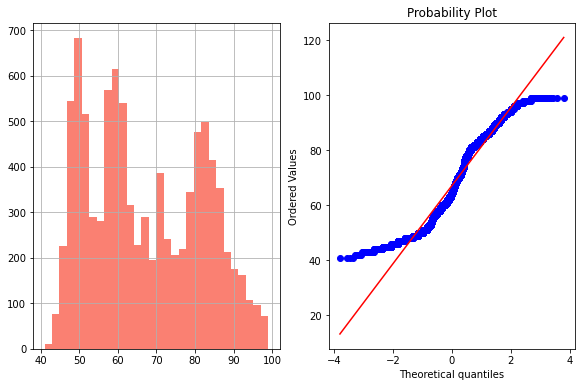

In [26]:
diagnostic_plots(hrdf_new, 'avg_training_score')

### 1.2 Cleanse and Transform the data

### Missing Value Imputation

In [27]:
hrdf_new.isnull().sum()

employee_id               0
department                0
region                    0
education               352
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    702
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

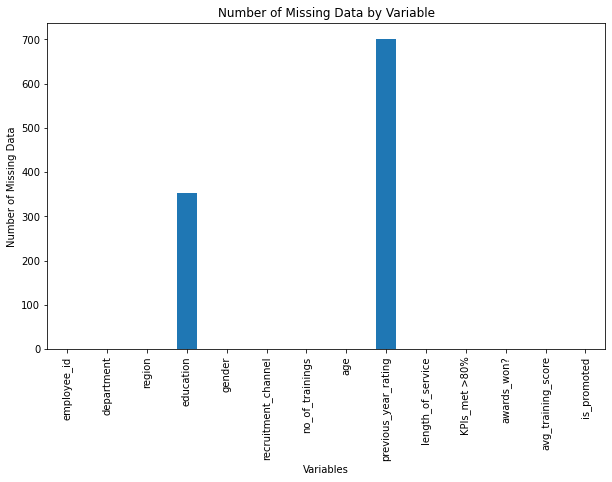

In [28]:
#Visualising missing data
missing_counts = hrdf_new.isnull().sum()

plt.figure(figsize=(10, 6))  # Set the figure size

missing_counts.plot(kind='bar')


plt.title('Number of Missing Data by Variable')  # Set the title
plt.xlabel('Variables')  # Set the x-axis label
plt.ylabel('Number of Missing Data')  # Set the y-axis label

plt.show()

#### Imputating Categorical Variable

In [29]:
#frequent imputation for categorical var
mode_imputer = mdi.CategoricalImputer(variables=['education'], imputation_method = 'frequent')

mode_imputer.fit(hrdf_new)

CategoricalImputer(imputation_method='frequent', variables=['education'])

In [30]:
hrdf_new = mode_imputer.transform(hrdf_new)


#### Imputating Numerical Variable

In [31]:
#Testing hypothesis
# Assuming hrdf_new is your DataFrame
rows_with_zero_rating = hrdf_new[hrdf_new['previous_year_rating'] == 0]

# Checking if length_of_service is equal to 1 for all rows with previous_year_rating = 0
check_condition = all(rows_with_zero_rating['length_of_service'] == 1)

print(f"For all rows with previous_year_rating = 0, length_of_service is equal to 1: {check_condition}")


For all rows with previous_year_rating = 0, length_of_service is equal to 1: True


In [32]:
hrdf_new['previous_year_rating'].fillna(0, inplace=True)


### Outlier Handling and Data Transformation

In [33]:
# Print the maximum value in 'age'
max_age = hrdf_new['age'].max()
print("Maximum value in 'age':", max_age)

# Print the maximum value in 'length_of_service'
max_length_of_service = hrdf_new['length_of_service'].max()
print("Maximum value in 'length_of_service':", max_length_of_service)



Maximum value in 'age': 60
Maximum value in 'length_of_service': 34


### Categorical Data Encoding

In [34]:
categorical_variables = hrdf_new.select_dtypes(include=['object']).columns
print("Categorical Variables in dataset:")
print(categorical_variables)


Categorical Variables in dataset:
Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


In [35]:
# Print the number of unique values for each categorical variable
for variable in categorical_variables:
    unique_values_count = hrdf_new[variable].nunique()
    print(f"Number of unique values in {variable}: {unique_values_count}")

Number of unique values in department: 9
Number of unique values in region: 34
Number of unique values in education: 3
Number of unique values in gender: 2
Number of unique values in recruitment_channel: 3


#### Ordered Ordinal Encoding

In [36]:
#For categorical variables with no clear hierarchy
#The number represetation of the encoding helps the model to capture the effect of each level of the 
#hierarchy on the target variable
#Using Mapping to show ranking of education level
education_mapping = {'Below Secondary': 1, "Bachelor's": 2, "Master's & above": 3}

# Apply the custom ordinal encoding
hrdf_new['education'] = hrdf_new['education'].map(education_mapping)


#### One Hot Encoding


In [37]:
#Categorical Data Encoding using one Hot Encoding With Feature Engine
#Norminal variables(no clear hierarchy)
ohe_cat = ['department','recruitment_channel']
ohe_enc = OneHotEncoder(variables=ohe_cat)


In [38]:
ohe_enc.fit(hrdf_new)

OneHotEncoder(variables=['department', 'recruitment_channel'])

In [39]:
hrdf_new = ohe_enc.transform(hrdf_new)

#### Label Encoding

In [40]:
le = LabelEncoder()
hrdf_new['gender'] = le.fit_transform(hrdf_new['gender'])

#### Frequency Encoder

In [41]:
#Using Frequency Encoding with feature Engine
fre_cat =['region']
count_enc = CountFrequencyEncoder(
    encoding_method='count', 
    variables= fre_cat)

In [42]:
 count_enc.fit(hrdf_new)

CountFrequencyEncoder(variables=['region'])

In [43]:
 hrdf_new = count_enc.transform(hrdf_new)


### Feature Scaling

In [44]:
copy1 = hrdf_new.copy()

In [45]:
# Separate 'price' from listing_data_new
target_column = hrdf_new['is_promoted']
hrdf_new = hrdf_new.drop(columns=['is_promoted'])

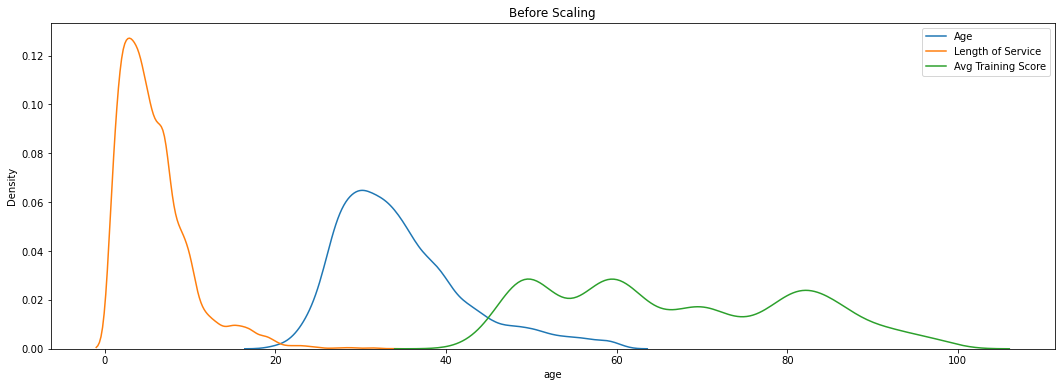

In [46]:
# Before scaling
fig, ax1 = plt.subplots(figsize=(18, 6))
ax1.set_title('Before Scaling')
sns.kdeplot(hrdf_new['age'], ax=ax1, label='Age')
sns.kdeplot(hrdf_new['length_of_service'], ax=ax1, label='Length of Service')
sns.kdeplot(hrdf_new['avg_training_score'], ax=ax1, label='Avg Training Score')
ax1.legend()

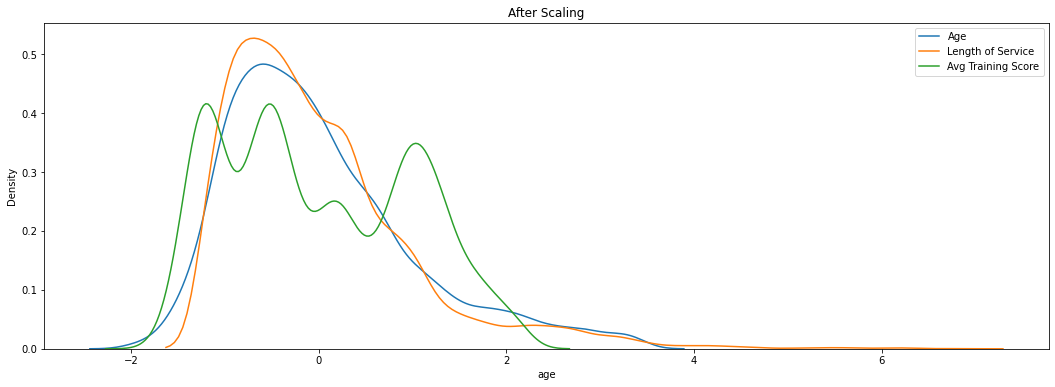

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
copy = hrdf_new
 # Create a scaler
scaler = StandardScaler()


# extract only the numerical columns for scaling
numerical_columns = hrdf_new.select_dtypes(include=['int64', 'float64']).columns

# fit the scalers to the train set, it will learn the parameters
scaler.fit(hrdf_new[numerical_columns])


# transform train and test sets
hrdf_new[numerical_columns] = scaler.transform(hrdf_new[numerical_columns])


fig, ax2 = plt.subplots(figsize=(18, 6))
# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(hrdf_new['age'], ax=ax2, label='Age')
sns.kdeplot(hrdf_new['length_of_service'], ax=ax2, label='Length of Service')
sns.kdeplot(hrdf_new['avg_training_score'], ax=ax2, label='Avg Training Score')
ax2.legend()

plt.show()


In [48]:
hrdf_new['is_promoted'] = target_column

### 1.3 Correlation Analysis

### Looking at Current distribution & Impact on is promoted

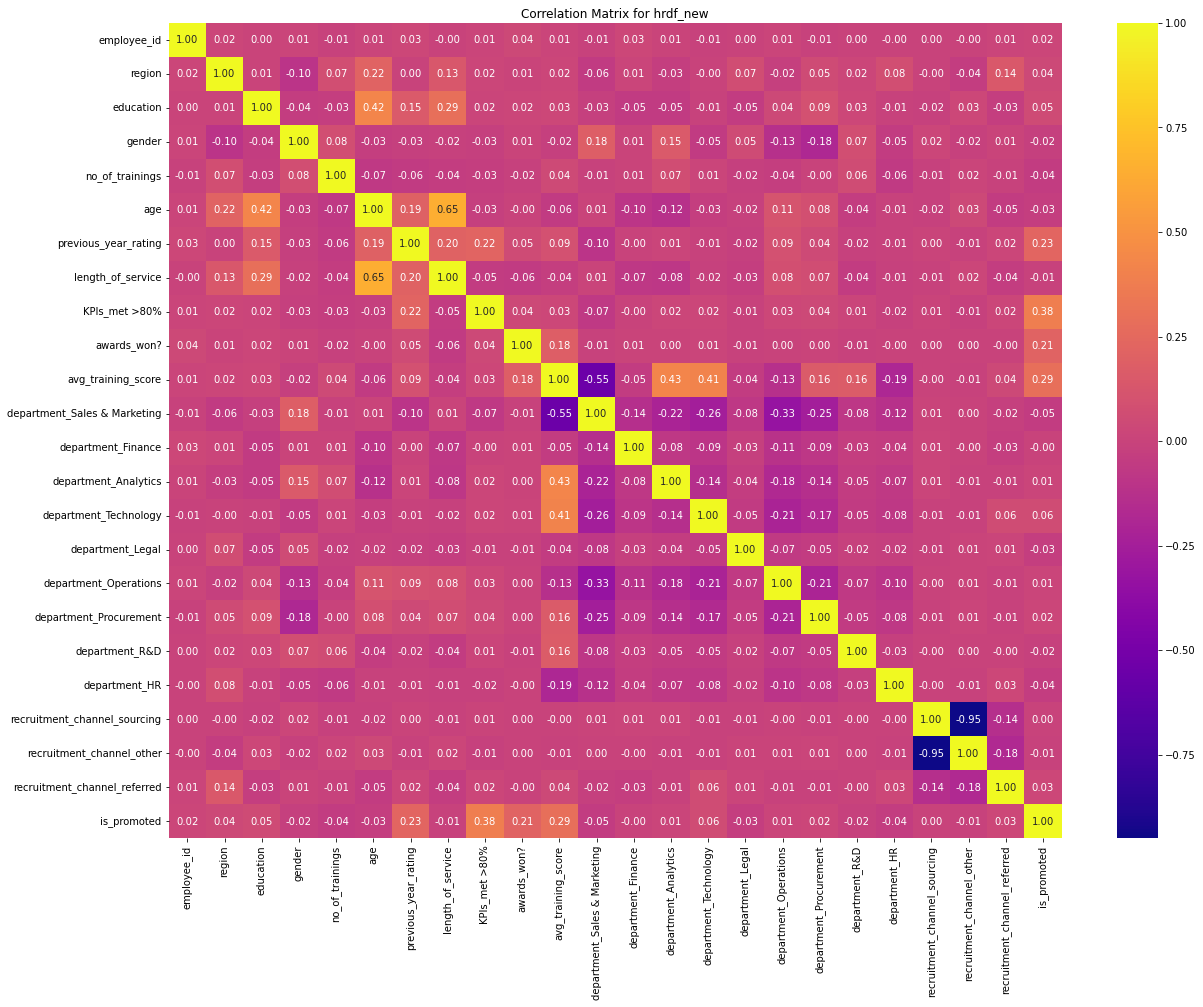

In [49]:
correlation_matrix = hrdf_new.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", fmt=".2f")
plt.title('Correlation Matrix for hrdf_new')
plt.show()

In [50]:
# Set a threshold for high correlation
threshold = 0.2  # Adjust the threshold as needed

# Filter variables with correlation greater than the threshold with 'is_promoted'
high_correlation_vars = correlation_matrix.loc['is_promoted'][abs(correlation_matrix.loc['is_promoted']) > threshold].index.tolist()

# Remove 'is_promoted' itself from the list (since it will have a perfect correlation of 1)
high_correlation_vars.remove('is_promoted')

# Print out the variables
print("Variables with high correlation to 'is_promoted':")
print(high_correlation_vars)


Variables with high correlation to 'is_promoted':
['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


In [51]:
low_correlation_vars = correlation_matrix.loc['is_promoted'][(correlation_matrix.loc['is_promoted'] < 0.1) & (correlation_matrix.loc['is_promoted'] > 0)].index.tolist()

# Print out the variables
print("Variables with correlation between 0 and 0.2 with 'is_promoted':")
print(low_correlation_vars)


Variables with correlation between 0 and 0.2 with 'is_promoted':
['employee_id', 'region', 'education', 'department_Analytics', 'department_Technology', 'department_Operations', 'department_Procurement', 'recruitment_channel_sourcing', 'recruitment_channel_referred']


In [52]:
negative_correlation_vars = correlation_matrix.loc['is_promoted'][correlation_matrix.loc['is_promoted'] < 0].index.tolist()

# Print out the variables
print("Variables with negative correlation with 'is_promoted':")
print(negative_correlation_vars)


Variables with negative correlation with 'is_promoted':
['gender', 'no_of_trainings', 'age', 'length_of_service', 'department_Sales & Marketing', 'department_Finance', 'department_Legal', 'department_R&D', 'department_HR', 'recruitment_channel_other']


In [53]:
import statsmodels.api as sm
X = hrdf_new.drop('is_promoted', axis=1)
y = hrdf_new['is_promoted']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Display the summary
model.summary()


         Current function value: 0.434016
         Iterations: 35


C:\Users\huohe\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 9336
Model:                          Logit   Df Residuals:                     9314
Method:                           MLE   Df Model:                           21
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.3738
Time:                        23:29:46   Log-Likelihood:                -4052.0
converged:                      False   LL-Null:                       -6471.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.3155   2.76e+06  -1.14e-07      1.000   -5.42e+06    5.42e+06
employee_id                      0.0015      0.028      0.055      0.956      -0.053       0.056
region                           0.0998      0.030      3.376      0.001       0.042       0.158
education                        0.1274      0.031      4.119      0.000       0.067       0.188
gender                          -0.0466      0.064     -0.733      0.463      -0.171       0.078
no_of_trainings                 -0.0542      0.029     -1.885      0.059      -0.111       0.002
age                             -0.2995      0.041     -7.363      0.000      -0.379      -0.220
previous_year_rating             0.2614      0.029      8.902      0.000       0.204       0.319
length_of_service                0.1198      0.037      3.211      0.001       0.047       0.193
KPIs_met >80%                    1.3295      0.034     39.158      0.000       1.263       1.396
awards_won?                      0.4315      0.040     10.849      0.000       0.354       0.509
avg_training_score               4.1420      0.108     38.183      0.000       3.929       4.355
department_Sales & Marketing     4.6936   3.64e+06   1.29e-06      1.000   -7.13e+06    7.13e+06
department_Finance               1.5943   3.47e+06   4.59e-07      1.000   -6.81e+06    6.81e+06
department_Analytics            -4.7045   3.47e+06  -1.35e-06      1.000   -6.81e+06    6.81e+06
department_Technology           -3.2401   3.53e+06  -9.19e-07      1.000   -6.91e+06    6.91e+06
department_Legal                 1.5019   3.44e+06   4.37e-07      1.000   -6.74e+06    6.74e+06
department_Operations            1.7973   3.49e+06   5.15e-07      1.000   -6.84e+06    6.84e+06
department_Procurement          -1.0037   3.49e+06  -2.87e-07      1.000   -6.84e+06    6.84e+06
department_R&D                  -5.2498   3.53e+06  -1.49e-06      1.000   -6.91e+06    6.91e+06
department_HR                    4.2956   3.32e+06   1.29e-06      1.000   -6.51e+06    6.51e+06
recruitment_channel_sourcing    -0.1086   1.74e+06  -6.24e-08      1.000   -3.41e+06    3.41e+06
recruitment_channel_other       -0.0418   1.74e+06   -2.4e-08      1.000   -3.41e+06    3.41e+06
recruitment_channel_referred    -0.1650   1.74e+06  -9.48e-08      1.000   -3.41e+06    3.41e+06
================================================================================================
"""

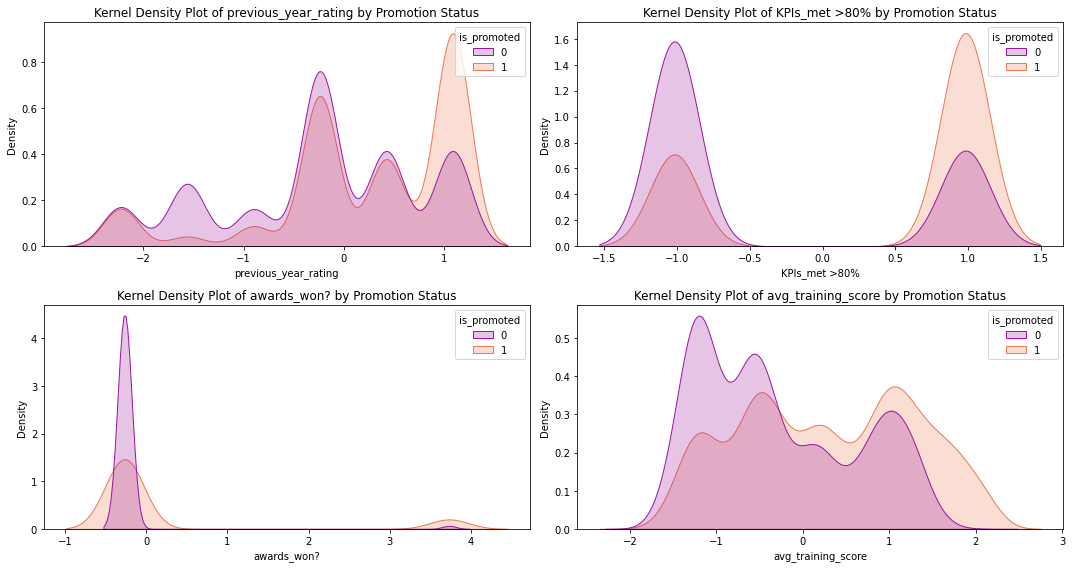

In [54]:
selected_columns = ['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
selected_df = hrdf_new[selected_columns]

# Plot kernel density plots
plt.figure(figsize=(15, 8))
for i, column in enumerate(['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=selected_df, x=column, hue='is_promoted', fill=True, common_norm=False,palette = 'plasma')
    plt.title(f'Kernel Density Plot of {column} by Promotion Status')

plt.tight_layout()
plt.show()

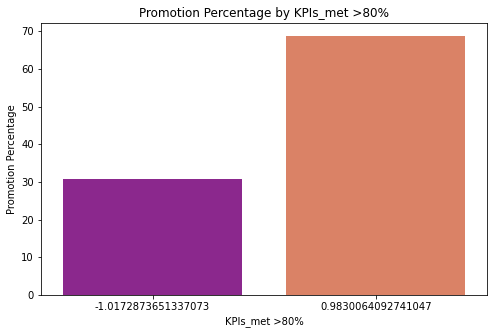

In [55]:
feature = 'KPIs_met >80%'
target_variable = 'is_promoted'

# Calculate the percentage of promotions for each category in the feature
promotion_percentage = hrdf_new.groupby(feature)[target_variable].mean() * 100

# Create a bar plot with the calculated percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=promotion_percentage.index, y=promotion_percentage.values, palette = 'plasma')
plt.xlabel(feature)
plt.ylabel('Promotion Percentage')
plt.title(f'Promotion Percentage by {feature}')
plt.show()

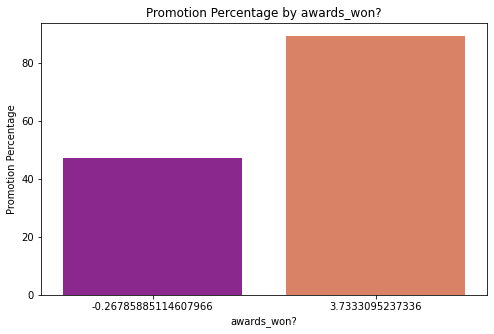

In [56]:
feature = 'awards_won?'
target_variable = 'is_promoted'

# Calculate the percentage of promotions for each category in the feature
promotion_percentage = hrdf_new.groupby(feature)[target_variable].mean() * 100

# Create a bar plot with the calculated percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=promotion_percentage.index, y=promotion_percentage.values, palette = 'plasma')
plt.xlabel(feature)
plt.ylabel('Promotion Percentage')
plt.title(f'Promotion Percentage by {feature}')
plt.show()

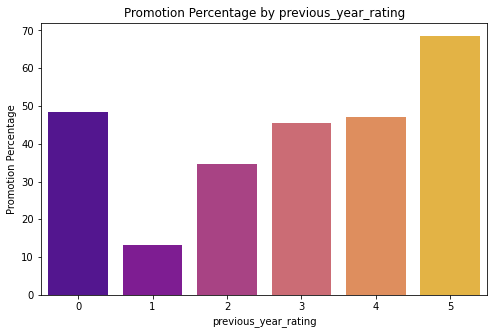

In [57]:
feature = 'previous_year_rating'
target_variable = 'is_promoted'

# Calculate the percentage of promotions for each category in the feature
promotion_percentage = hrdf_new.groupby(feature)[target_variable].mean() * 100  # Calculate percentage

# Create a bar plot with the calculated percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=promotion_percentage.index, y=promotion_percentage.values, palette='plasma')

# Set x-axis ticks from 0 to 5
plt.xticks(range(6), labels=[str(i) for i in range(6)])

plt.xlabel(feature)
plt.ylabel('Promotion Percentage')
plt.title(f'Promotion Percentage by {feature}')
plt.show()

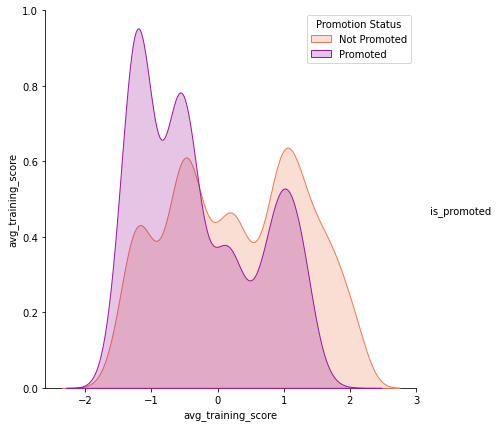

In [58]:
sns.pairplot(hrdf_new[['avg_training_score', 'is_promoted']], hue='is_promoted', height=6,palette = 'plasma')
# Add a legend
plt.legend(title='Promotion Status', loc='upper right', labels=['Not Promoted', 'Promoted'])

plt.show()

### Creating Features

In [59]:
copy1['training_performance'] = copy1['no_of_trainings'] * copy1['avg_training_score']

In [60]:
copy1['high_performer'] = ((copy1['KPIs_met >80%'] == 1) & (copy1['awards_won?'] == 1) ).astype(int)


In [61]:
# Assign weights
weight_previous_year_rating = 0.3
weight_kpis_met = 0.2
weight_awards_won = 0.4
weight_avg_training_score = 0.1

# Calculate weighted sum
copy1['weighted_sum'] = (
    weight_previous_year_rating * copy1['previous_year_rating'] +
    weight_kpis_met * copy1['KPIs_met >80%'] +
    weight_awards_won * copy1['awards_won?'] +
    weight_avg_training_score * copy1['avg_training_score']
)


In [62]:

copy1['training_score_percentile'] = np.percentile(copy1['avg_training_score'], copy1['avg_training_score'], interpolation='nearest')


In [63]:
hrdf_new['training_performance'] =copy1['training_performance'] 

In [64]:
hrdf_new['high_performer'] = copy1['high_performer'] 

In [65]:
hrdf_new['weighted_sum'] = copy1['weighted_sum'] 

In [66]:
hrdf_new['training_score_percentile'] = copy1['training_score_percentile'] 

In [67]:
hrdf_new.head()

employee_id    region  education  gender  no_of_trainings       age  \
11     0.448163  0.103113  -0.577618       0        -0.402832  0.054106   
39     0.858341 -0.782916  -0.577618       1        -0.402832 -0.214370   
60    -0.936203 -0.623321   1.508511       1        -0.402832  2.067679   
66     1.727412  0.576396  -0.577618       1        -0.402832 -1.019799   
67    -0.987923  0.576396  -0.577618       1        -0.402832 -1.019799   

    previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  ...  \
11              1.091805          -0.665623       0.983006    -0.267859  ...   
39              1.091805           0.058003       0.983006    -0.267859  ...   
60              0.428408           2.711297       0.983006    -0.267859  ...   
66             -2.225179          -1.148040       0.983006     3.733310  ...   
67             -2.225179          -1.148040      -1.017287    -0.267859  ...   

    department_R&D  department_HR  recruitment_channel_sourcing  \
11               0              0                             1   
39               0              0                             1   
60               0              0                             0   
66               0              0                             0   
67               0              0                             1   

    recruitment_channel_other  recruitment_channel_referred  is_promoted  \
11                          0                             0            1   
39                          0                             0            1   
60                          1                             0            1   
66                          1                             0            1   
67                          0                             0            1   

    training_performance  high_performer  weighted_sum  \
11                    50               0           6.7   
39                    51               0           6.8   
60                    47               0           6.1   
66                    58               1           6.4   
67                    61               0           6.1   

    training_score_percentile  
11                         65  
39                         65  
60                         63  
66                         70  
67                         71  

[5 rows x 28 columns]

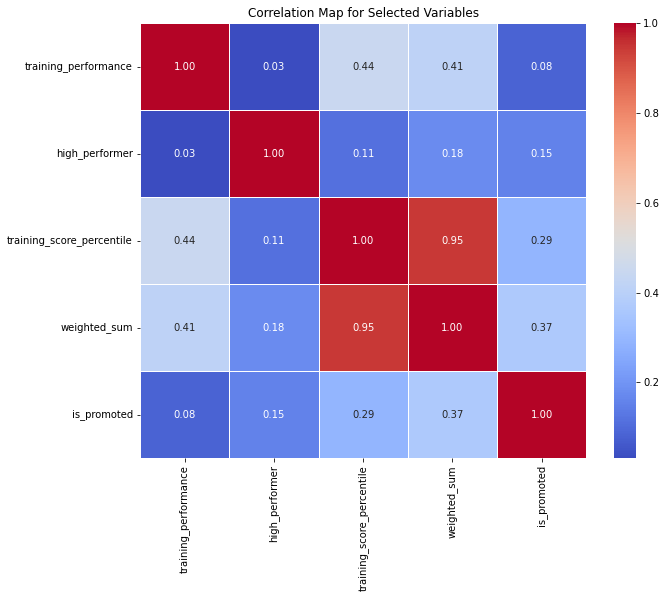

In [68]:
selected_variables = ['training_performance', 'high_performer', 'training_score_percentile', 'weighted_sum', 'is_promoted']
selected_data = hrdf_new[selected_variables]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation map using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map for Selected Variables')
plt.show()

In [69]:
hrdf_new.head(100)

employee_id    region  education  gender  no_of_trainings       age  \
11       0.448163  0.103113  -0.577618       0        -0.402832  0.054106   
39       0.858341 -0.782916  -0.577618       1        -0.402832 -0.214370   
60      -0.936203 -0.623321   1.508511       1        -0.402832  2.067679   
66       1.727412  0.576396  -0.577618       1        -0.402832 -1.019799   
67      -0.987923  0.576396  -0.577618       1        -0.402832 -1.019799   
...           ...       ...        ...     ...              ...       ...   
1016    -1.429194  0.103113  -0.577618       1         1.358685 -0.751323   
1055    -1.420670 -0.507752  -0.577618       1        -0.402832  0.725297   
1074    -0.500276 -0.623321   1.508511       1        -0.402832  1.262250   
1085     1.354600 -1.027813  -0.577618       0        -0.402832 -1.422513   
1112     1.681346 -0.782916  -0.577618       1        -0.402832 -0.885561   

      previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
11                1.091805          -0.665623       0.983006    -0.267859   
39                1.091805           0.058003       0.983006    -0.267859   
60                0.428408           2.711297       0.983006    -0.267859   
66               -2.225179          -1.148040       0.983006     3.733310   
67               -2.225179          -1.148040      -1.017287    -0.267859   
...                    ...                ...            ...          ...   
1016              1.091805          -0.906832      -1.017287    -0.267859   
1055             -0.234989           1.505254       0.983006    -0.267859   
1074             -0.234989           2.228880       0.983006    -0.267859   
1085             -2.225179          -1.148040      -1.017287    -0.267859   
1112              1.091805          -0.424414      -1.017287     3.733310   

      ...  department_R&D  department_HR  recruitment_channel_sourcing  \
11    ...               0              0                             1   
39    ...               0              0                             1   
60    ...               0              0                             0   
66    ...               0              0                             0   
67    ...               0              0                             1   
...   ...             ...            ...                           ...   
1016  ...               0              0                             1   
1055  ...               0              0                             0   
1074  ...               0              0                             1   
1085  ...               0              0                             1   
1112  ...               0              0                             0   

      recruitment_channel_other  recruitment_channel_referred  is_promoted  \
11                            0                             0            1   
39                            0                             0            1   
60                            1                             0            1   
66                            1                             0            1   
67                            0                             0            1   
...                         ...                           ...          ...   
1016                          0                             0            1   
1055                          1                             0            1   
1074                          0                             0            1   
1085                          0                             0            1   
1112                          1                             0            1   

      training_performance  high_performer  weighted_sum  \
11                      50               0           6.7   
39                      51               0           6.8   
60                      47               0           6.1   
66                      58               1           6.4   
67                      61    

### Dropping features

In [70]:
columns_to_drop = [
    'employee_id', 'region', 'education', 'department_Analytics',
    'department_Technology', 'department_Operations', 'department_Procurement',
    'recruitment_channel_sourcing', 'recruitment_channel_referred',
     'training_performance','no_of_trainings', 'age', 'department_Sales & Marketing', 'department_Finance', 'department_Legal', 'department_R&D', 'department_HR', 'recruitment_channel_other', 'gender'
]

# Check if columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in hrdf_new.columns]

# Drop the specified columns
hrdf_new.drop(columns=columns_to_drop, inplace=True)

# Verify the changes
print(hrdf_new.head())



    previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
11              1.091805          -0.665623       0.983006    -0.267859   
39              1.091805           0.058003       0.983006    -0.267859   
60              0.428408           2.711297       0.983006    -0.267859   
66             -2.225179          -1.148040       0.983006     3.733310   
67             -2.225179          -1.148040      -1.017287    -0.267859   

    avg_training_score  is_promoted  high_performer  weighted_sum  \
11           -1.174075            1               0           6.7   
39           -1.105435            1               0           6.8   
60           -1.379994            1               0           6.1   
66           -0.624956            1               1           6.4   
67           -0.419037            1               0           6.1   

    training_score_percentile  
11                         65  
39                         65  
60                         63  
66    

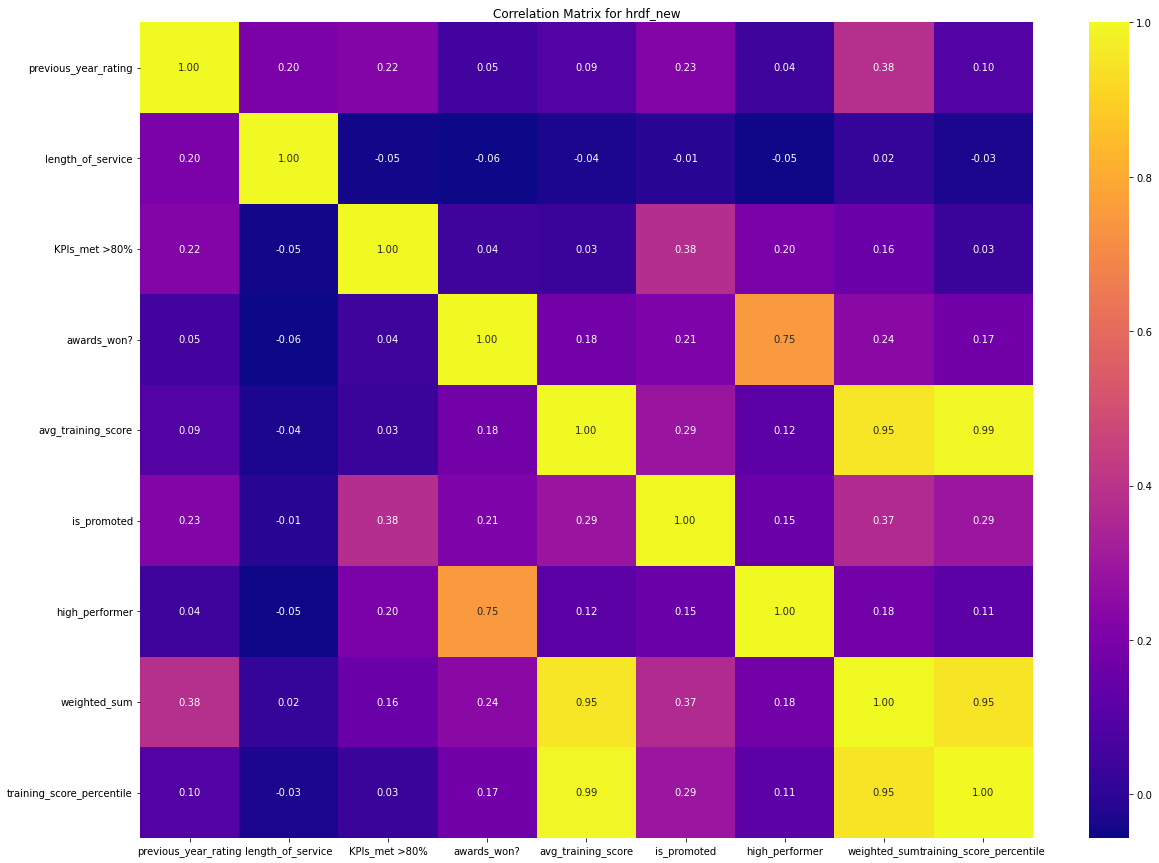

In [71]:
correlation_matrix = hrdf_new.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", fmt=".2f")
plt.title('Correlation Matrix for hrdf_new')
plt.show()

### 1.4 Export the data

In [72]:
hrdf_new.to_csv("HRdata.csv", index = False)
hr = pd.read_csv("HRdata.csv")
print(hr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   previous_year_rating       9336 non-null   float64
 1   length_of_service          9336 non-null   float64
 2   KPIs_met >80%              9336 non-null   float64
 3   awards_won?                9336 non-null   float64
 4   avg_training_score         9336 non-null   float64
 5   is_promoted                9336 non-null   int64  
 6   high_performer             9336 non-null   int64  
 7   weighted_sum               9336 non-null   float64
 8   training_score_percentile  9336 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 656.6 KB
None


## 2. Airbnb

### 2.1 Load and Explore the data

In [73]:
abdf = pd.read_csv('./MLasgdata/listings.csv')

In [74]:
abdf.shape

(7907, 16)

In [75]:
abdf.head(50)

id                                               name  host_id  \
0    49091                  COZICOMFORT LONG TERM STAY ROOM 2   266763   
1    50646                    Pleasant Room along Bukit Timah   227796   
2    56334                                        COZICOMFORT   266763   
3    71609                Ensuite Room (Room 1 & 2) near EXPO   367042   
4    71896                    B&B  Room 1 near Airport & EXPO   367042   
5    71903                         Room 2-near Airport & EXPO   367042   
6    71907                   3rd level Jumbo room 5 near EXPO   367042   
7   241503             Long stay at The Breezy East "Leopard"  1017645   
8   241508            Long stay at The Breezy East "Plumeria"  1017645   
9   241510            Long stay at The Breezy East "Red Palm"  1017645   
10  275343  Conveniently located City Room!( (Phone number...  1439258   
11  275344              15 mins to Outram MRT Single Room (B)  1439258   
12  289234                             Booking for 3 bedrooms   367042   
13  294281                     5 mins walk from Newton subway  1521514   
14  324945                 20 Mins to Sentosa @ Hilltop ! (8)  1439258   
15  330089             Accomo@ REDHILL-INSEAD, NTU,NUS -Mu(D)  1439258   
16  330095       10 mins to Redhill MRT @ Mini Orange Room(5)  1439258   
17  344803                  Budget short stay room near  EXPO   367042   
18  355955    Double room in an Authentic Peranakan Shophouse  1759905   
19  369141                    5mins from Newton Train Station  1521514   
20  369145                        5 mins walk from Newton MRT  1521514   
21  395191               Heritage Apartment Room near Orchard  1975201   
22  423875                    Master Bedroom 4-Airport & EXPO   367042   
23  481789                 Master Bedroom in Newly Built Flat  2386154   
24  553229              Comfortable Condo Room - Boon Lay MRT  1030128   
25  604966                  Boutique 1 bedroom entiere appart  2996022   
26  642660                 BEST CITY LIVING WITH GA RESIDENCE  3212572   
27  696136              Quiet ensuite room in Holland Village  1289033   
28  719944                HDB housing in prime area near town  3648224   
29  733863                              Homestay at Serangoon  3824517   
30  746929    2 Bdrm Spacious Condo_SeaView _10 Mins to Beach  3919513   
31  756267                                East Coast Boutique  1584407   
32  756300                             Cosy Furnished bedroom  3981231   
33  756347                     Bedroom for one. Good sea view  3981177   
34  764599                         10mins MRT to Orchard Road  4030859   
35  765579             Chinatown@doorstep: *Queenbed Room 891  2413412   
36  768313                     Common Room for rent immediate  4053150   
37  782227                  Cosy, bright, tasefully furnished  4125828   
38  804470                   Spacious Luxury Condo in Orchard   741873   
39  815685  Awesome Yellow Room in the City! Near Orchard Rd!  1439258   
40  819034                       Boutique 2 Bedroom Apartment  1584407   
41  819044                                East Coast Hideaway  1584407   
42  822413                   Ming Vase Theme - 2 BR Apartment  3951127   
43  823571                           Apartment away from town  4177147   
44  833289                     Warm hospitality Italian style  4360831   
45  872345                      Designer Designed Double Room  4602014   
46  880846                    1 bedrm Aptm by Farrer Park Mrt  4659563   
47  881253   Chinatown Doorstep: *Ensuite 1+1+ WOW city view!  2413412   
48  881683                    Tastefully Designed Single Room  4602014   
49  888196                Exclusive 4 BR Penthouse with Views  4710327   

                        host_name neighbourhood_group  neighbourhood  \
0                       Francesca        North Region      Woodlands   
1                         Sujatha      Central Region    Bukit Timah   
2                

In [76]:
abdf.tail()

id                                               name    host_id  \
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
7902     Belle      Central Region    Queenstown   1.27973  103.78751   
7903      Neha      Central Region       Tanglin   1.29269  103.82623   
7904     Mindy      Central Region       Kallang   1.31286  103.85996   
7905     Huang      Central Region  River Valley   1.29543  103.83801   
7906   Terence      Central Region  River Valley   1.29672  103.83325   

            room_type  price  minimum_nights  number_of_reviews last_review  \
7902  Entire home/apt    100               3                  0         NaN   
7903  Entire home/apt    550               6                  0         NaN   
7904     Private room     58              30                  0         NaN   
7905     Private room     56              14                  0         NaN   
7906     Private room     65              90                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
7902                NaN                              31                61  
7903                NaN                              34               365  
7904                NaN                               3               173  
7905                NaN                               2                30  
7906                NaN                               7               365

In [77]:
abdf.describe()

id       host_id     latitude    longitude         price  \
count  7.907000e+03  7.907000e+03  7907.000000  7907.000000   7907.000000   
mean   2.338862e+07  9.114481e+07     1.314192   103.848787    169.332996   
std    1.016416e+07  8.190910e+07     0.030577     0.043675    340.187599   
min    4.909100e+04  2.366600e+04     1.243870   103.646560      0.000000   
25%    1.582180e+07  2.305808e+07     1.295795   103.835825     65.000000   
50%    2.470627e+07  6.344891e+07     1.311030   103.849410    124.000000   
75%    3.234850e+07  1.553811e+08     1.322110   103.872535    199.000000   
max    3.811276e+07  2.885676e+08     1.454590   103.973420  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     7907.000000        7907.000000        5149.000000   
mean        17.510054          12.807386           1.043669   
std         42.094616          29.707746           1.285851   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.180000   
50%          3.000000           2.000000           0.550000   
75%         10.000000          10.000000           1.370000   
max       1000.000000         323.000000          13.000000   

       calculated_host_listings_count  availability_365  
count                     7907.000000       7907.000000  
mean                        40.607689        208.726318  
std                         65.135253        146.120034  
min                          1.000000          0.000000  
25%                          2.000000         54.000000  
50%                          9.000000        260.000000  
75%                         48.000000        355.000000  
max                        274.000000        365.000000

In [78]:
abdf.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

C:\Users\huohe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


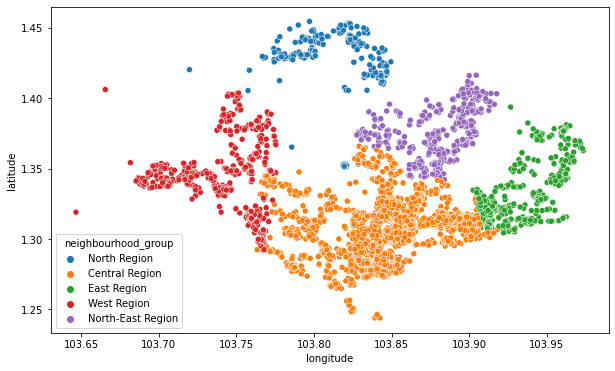

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(abdf.longitude,abdf.latitude,hue=abdf.neighbourhood_group)
plt.ioff()

### Create Price Range Coulmn

In [80]:
price_bins = [0, 50, 100, 150, 200, 500, 1000, 5000, 10001]  # Adjust the bins as needed
price_labels = ['0-50', '51-100', '101-150', '151-200', '201-500', '501-1000', '1001-5000', '5001-10000']

# Create a new column 'Price Range' based on the defined bins and labels
abdf['Price Range'] = pd.cut(abdf['price'], bins=price_bins, labels=price_labels, right=False)

In [81]:
price_range_counts = abdf['Price Range'].value_counts()
print(price_range_counts)

51-100        2148
201-500       1749
101-150       1683
151-200       1093
0-50          1015
501-1000       171
1001-5000       37
5001-10000      11
Name: Price Range, dtype: int64


### Subsetting Dataset by Region

Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64


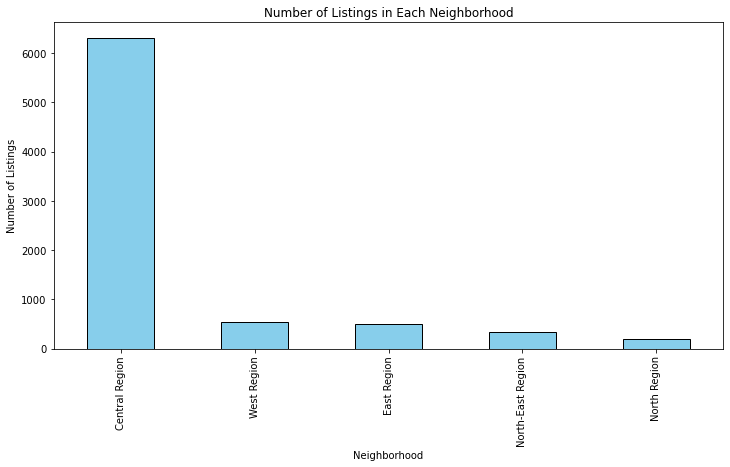

In [82]:

neighborhood_counts = abdf['neighbourhood_group'].value_counts()
print(neighborhood_counts)
# Plotting the counts

neighborhood_counts.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Number of Listings in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.show()

In [83]:
cendf = abdf[abdf['neighbourhood_group'] == 'Central Region']
cendf = cendf.drop(columns=['neighbourhood_group'])
# Display the subsetted data
print(cendf.head())

        id                                               name  host_id  \
1    50646                    Pleasant Room along Bukit Timah   227796   
10  275343  Conveniently located City Room!( (Phone number...  1439258   
11  275344              15 mins to Outram MRT Single Room (B)  1439258   
13  294281                     5 mins walk from Newton subway  1521514   
14  324945                 20 Mins to Sentosa @ Hilltop ! (8)  1439258   

        host_name neighbourhood  latitude  longitude     room_type  price  \
1         Sujatha   Bukit Timah   1.33235  103.78521  Private room     81   
10  K2 Guesthouse   Bukit Merah   1.28875  103.80814  Private room     44   
11  K2 Guesthouse   Bukit Merah   1.28837  103.81099  Private room     40   
13      Elizabeth        Newton   1.31125  103.83816  Private room     65   
14  K2 Guesthouse   Bukit Merah   1.28976  103.80896  Private room     44   

    minimum_nights  number_of_reviews last_review  reviews_per_month  \
1               90  

In [84]:
cendf.shape

(6309, 16)

In [85]:
# Assuming 'cendf' is your DataFrame
data_types = cendf.dtypes

# Display the data types
print(data_types)


id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood                       object
latitude                           float64
longitude                          float64
room_type                           object
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
Price Range                       category
dtype: object


### Splitting Dataset into Catergorical and Numerical Variables

In [86]:
#find numerical variables
num_cols = [c for c in cendf.columns if cendf[c].dtypes!='O']
cendf[num_cols].isnull().mean().sort_values()

id                                0.000000
host_id                           0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
Price Range                       0.000000
reviews_per_month                 0.343161
dtype: float64

In [87]:
#find categorical variables
cat_cols = [c for c in cendf.columns if cendf[c].dtypes=='O']
cendf[cat_cols].isnull().mean().sort_values()

host_name        0.000000
neighbourhood    0.000000
room_type        0.000000
name             0.000317
last_review      0.343161
dtype: float64

### Extracting Data From DateTime Object

In [88]:
# Retrieve Month-Year from last_review column
cendf['last_review'] = pd.to_datetime(cendf['last_review'])
# Extract the year from the 'last_review' column
cendf['review_year'] = cendf['last_review'].dt.year
cendf['review_month'] = cendf['last_review'].dt.year

In [89]:
cendf.head()

id                                               name  host_id  \
1    50646                    Pleasant Room along Bukit Timah   227796   
10  275343  Conveniently located City Room!( (Phone number...  1439258   
11  275344              15 mins to Outram MRT Single Room (B)  1439258   
13  294281                     5 mins walk from Newton subway  1521514   
14  324945                 20 Mins to Sentosa @ Hilltop ! (8)  1439258   

        host_name neighbourhood  latitude  longitude     room_type  price  \
1         Sujatha   Bukit Timah   1.33235  103.78521  Private room     81   
10  K2 Guesthouse   Bukit Merah   1.28875  103.80814  Private room     44   
11  K2 Guesthouse   Bukit Merah   1.28837  103.81099  Private room     40   
13      Elizabeth        Newton   1.31125  103.83816  Private room     65   
14  K2 Guesthouse   Bukit Merah   1.28976  103.80896  Private room     44   

    minimum_nights  number_of_reviews last_review  reviews_per_month  \
1               90                 18  2014-12-26               0.28   
10              15                 18  2019-04-21               0.23   
11              30                 10  2018-09-13               0.11   
13               2                125  2019-08-22               1.35   
14              30                 13  2019-02-02               0.15   

    calculated_host_listings_count  availability_365 Price Range  review_year  \
1                                1               365      51-100       2014.0   
10                              32               331        0-50       2019.0   
11                              32               276        0-50       2018.0   
13                               6               336      51-100       2019.0   
14                              32               340        0-50       2019.0   

    review_month  
1         2014.0  
10        2019.0  
11        2018.0  
13        2019.0  
14        2019.0

### Looking at Missing Data in Each Variable

In [90]:
cendf.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2165
reviews_per_month                 2165
calculated_host_listings_count       0
availability_365                     0
Price Range                          0
review_year                       2165
review_month                      2165
dtype: int64

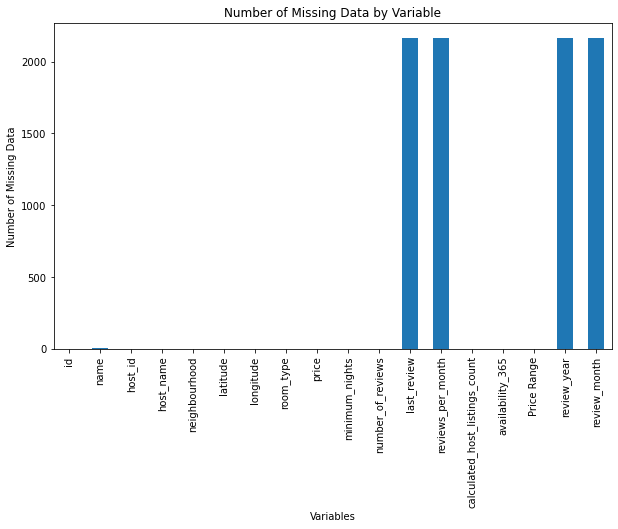

In [91]:
#Visualising missing data
color = []
missing_counts = cendf.isnull().sum()

plt.figure(figsize=(10, 6))  # Set the figure size

missing_counts.plot(kind='bar')


plt.title('Number of Missing Data by Variable')  # Set the title
plt.xlabel('Variables')  # Set the x-axis label
plt.ylabel('Number of Missing Data')  # Set the y-axis label

plt.show()

### Target Variable (price) exploration

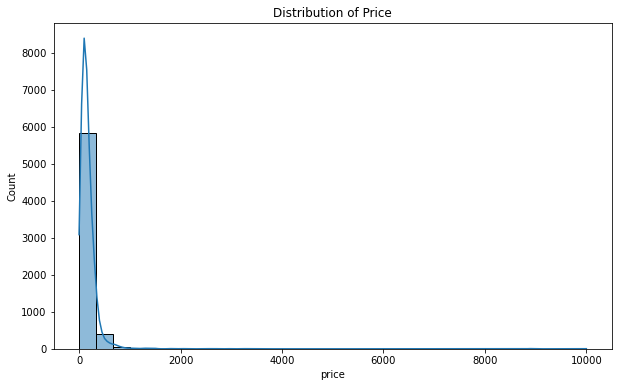

In [92]:
# 1. Distribution
plt.figure(figsize=(10, 6))
sns.histplot(cendf['price'], bins=30, kde=True,palette = 'autumn')
plt.title('Distribution of Price')
plt.show()


In [93]:
stats = cendf['price'].describe()
print("Descriptive Statistics:")
print(stats)

Descriptive Statistics:
count     6309.000000
mean       176.629418
std        293.992420
min          0.000000
25%         81.000000
50%        135.000000
75%        208.000000
max      10000.000000
Name: price, dtype: float64


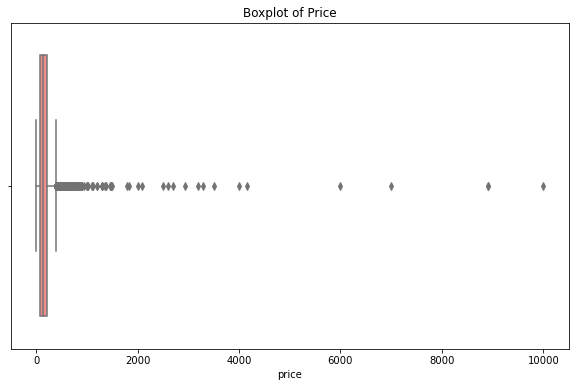

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cendf['price'],palette = 'spring')
plt.title('Boxplot of Price')
plt.show()

### Categorical Variable Exploration

In [95]:
sns.set(font_scale=1)

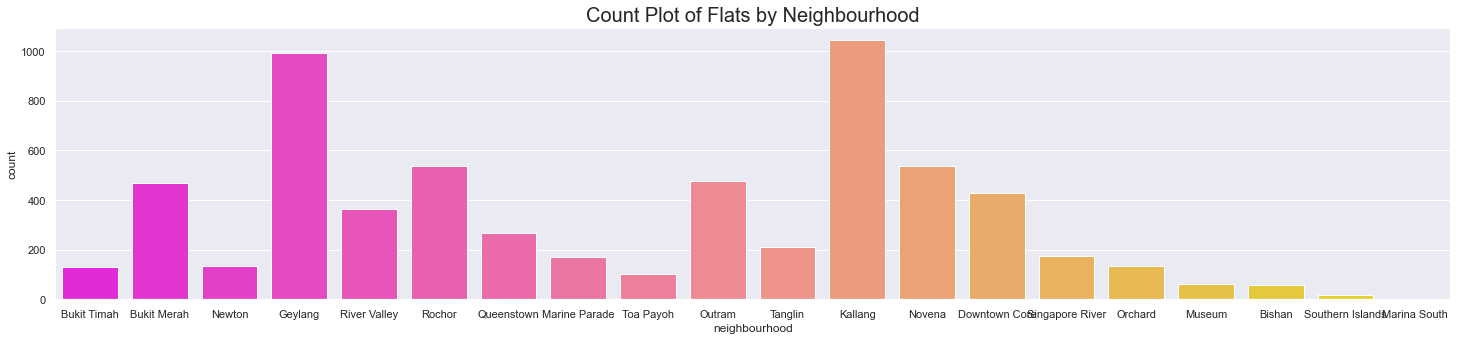

In [96]:

plt.figure(figsize=(25, 5))
sns.countplot(x='neighbourhood', data=cendf, palette = 'spring')
plt.title('Count Plot of Flats by Neighbourhood',fontsize=20)
plt.show()

In [97]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map([1.44255, 103.79580], zoom_start=11)
marker_cluster = MarkerCluster().add_to(m)

for index, row in cendf.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

display(m)

In [98]:
# Assuming 'cendf' is your DataFrame
unique_neighbourhoods = cendf['neighbourhood'].unique()
print(unique_neighbourhoods)

['Bukit Timah' 'Bukit Merah' 'Newton' 'Geylang' 'River Valley' 'Rochor'
 'Queenstown' 'Marine Parade' 'Toa Payoh' 'Outram' 'Tanglin' 'Kallang'
 'Novena' 'Downtown Core' 'Singapore River' 'Orchard' 'Museum' 'Bishan'
 'Southern Islands' 'Marina South']


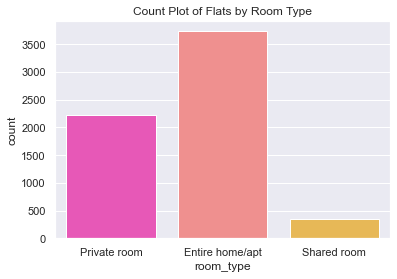

In [99]:

sns.countplot(x='room_type', data=cendf,palette = 'spring')
plt.title('Count Plot of Flats by Room Type')
plt.show()

### Categorical Variable and Target Variable (Price)

<Figure size 720x432 with 0 Axes>

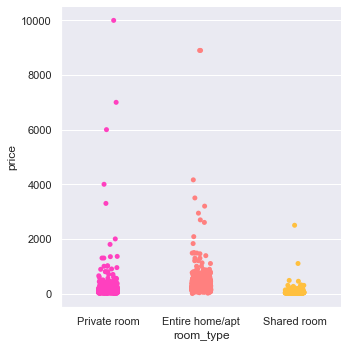

In [100]:
plt.figure(figsize=(10,6))
sns.catplot(x="room_type", y="price", data=cendf,palette = 'spring');
plt.ioff()

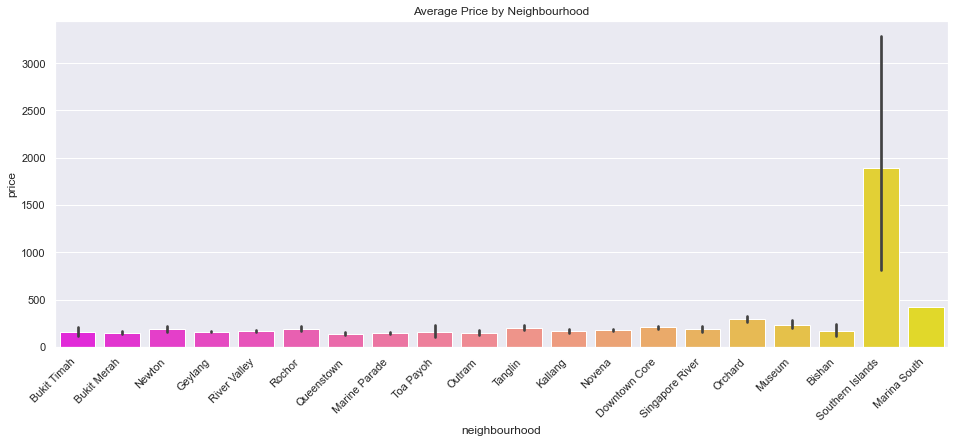

In [101]:
# Bar plot of 'neighbourhood' and average price
plt.figure(figsize=(16, 6))
sns.barplot(x='neighbourhood', y='price', data=cendf,palette = 'spring')
plt.title('Average Price by Neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.show()

In [102]:
neighbourhood_prices = cendf.groupby('neighbourhood')['price'].agg(['mean', 'median']).reset_index()

# Rename the columns for clarity
neighbourhood_prices.columns = ['Neighbourhood', 'Mean Price', 'Median Price']

# Display the table
print(neighbourhood_prices)

       Neighbourhood   Mean Price  Median Price
0             Bishan   170.508772          90.0
1        Bukit Merah   151.442553         119.0
2        Bukit Timah   153.969466          94.0
3      Downtown Core   205.394860         165.0
4            Geylang   161.598592         139.5
5            Kallang   166.162991         119.0
6       Marina South   419.000000         419.0
7      Marine Parade   145.818713         118.0
8             Museum   236.317460         168.0
9             Newton   188.746269         131.0
10            Novena   177.441341         156.0
11           Orchard   291.029412         290.0
12            Outram   145.937107         106.0
13        Queenstown   140.364662         119.0
14      River Valley   164.977901         131.0
15            Rochor   188.792910         131.0
16   Singapore River   189.937143         135.0
17  Southern Islands  1893.764706         865.0
18           Tanglin   201.276190         151.0
19         Toa Payoh   153.237624       

### Numerical Variable Exploration

### Visualizing Outliers in Numerical Variables

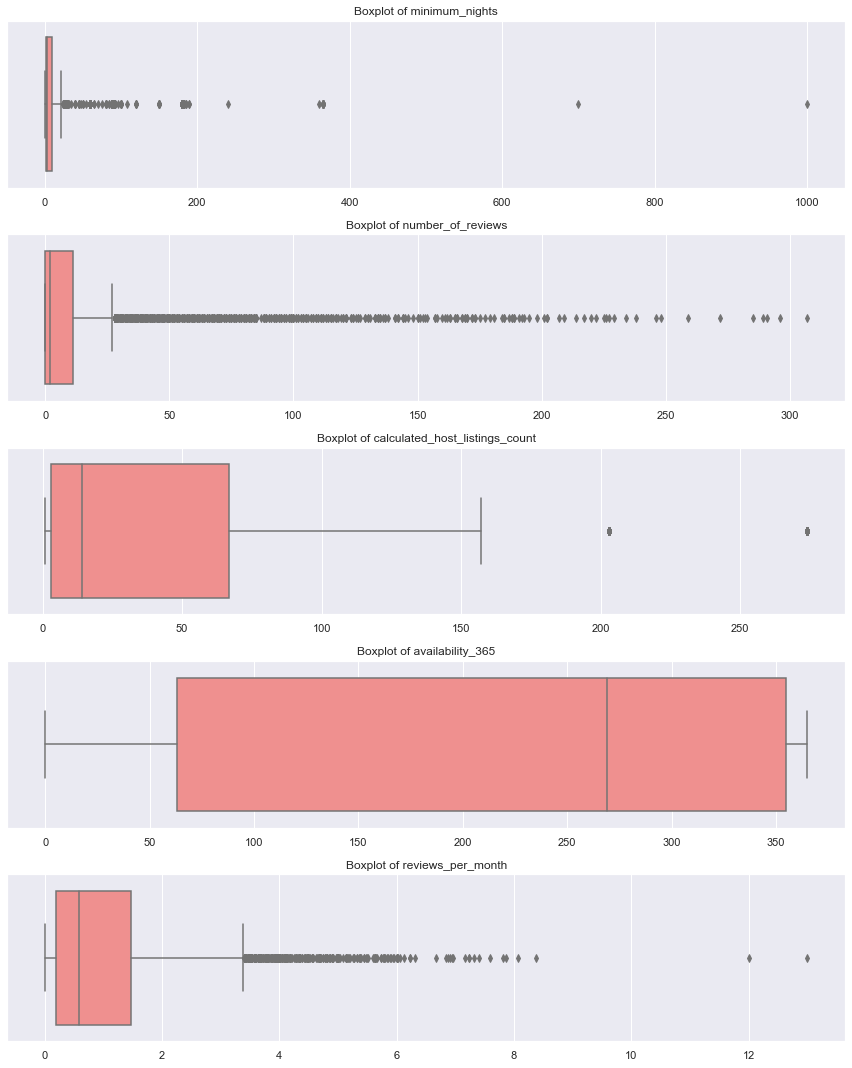

In [103]:
# List of numerical variables
numerical_variables = [
    'minimum_nights',
    'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365',
    'reviews_per_month'
]

# Create subplots
plt.figure(figsize=(12, 3 * len(numerical_variables)))

# Iterate through numerical variables and create horizontal boxplots
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(len(numerical_variables), 1, i)
    sns.boxplot(x=cendf[var], orient='h',palette = 'spring')  # Set the orientation to horizontal
    plt.title(f'Boxplot of {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

### Visualizing Distribution of Numerical Variables

In [104]:
import scipy.stats as stats 

In [105]:
numerical_variables = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365',
    'reviews_per_month'
]


In [106]:
def diagnostic_plots(df, variable,color = '#FFC300'):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30,color = color)

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    

    plt.show()

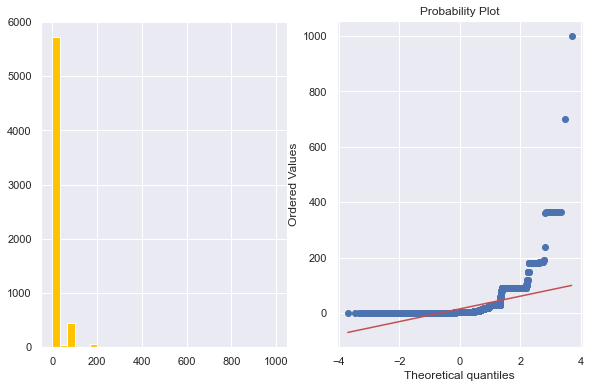

In [107]:
diagnostic_plots(cendf, 'minimum_nights')

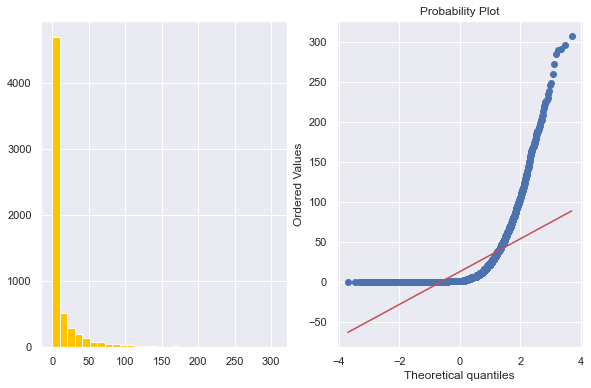

In [108]:
diagnostic_plots(cendf, 'number_of_reviews')

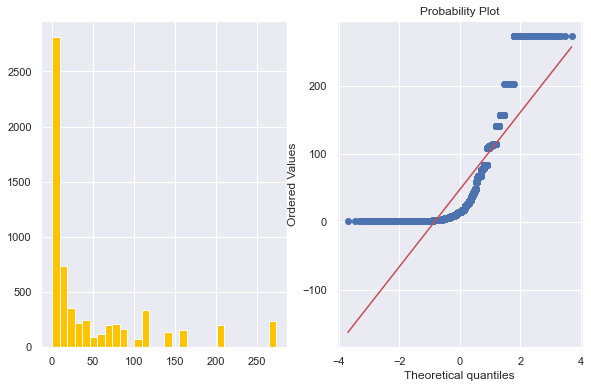

In [109]:
diagnostic_plots(cendf, 'calculated_host_listings_count')

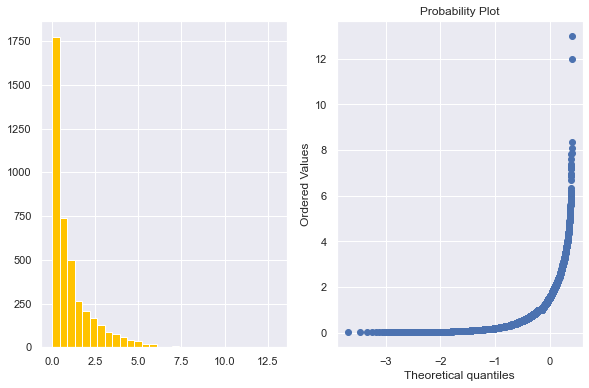

In [110]:
diagnostic_plots(cendf,'reviews_per_month')

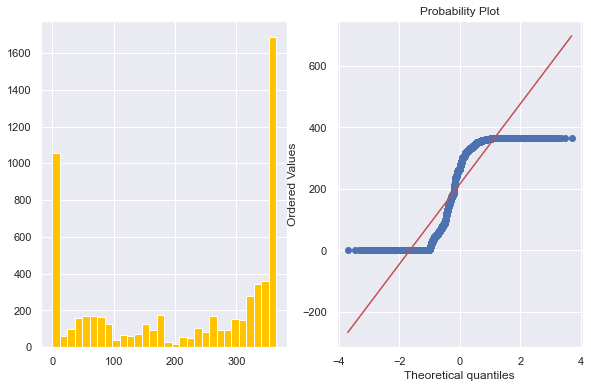

In [111]:
diagnostic_plots(cendf, 'availability_365')

### 2.2 Cleanse and Transform the data

### Missing Value Imputation

In [112]:
cendf.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2165
reviews_per_month                 2165
calculated_host_listings_count       0
availability_365                     0
Price Range                          0
review_year                       2165
review_month                      2165
dtype: int64

#### Imputating Last Reviews and Reviews per Month

In [113]:
#Testing hypothesis
filtered_data = cendf[(cendf['last_review'].isnull() | cendf['reviews_per_month'].isnull())]
zero_reviews_condition = filtered_data['number_of_reviews'] == 0

# Check if the condition holds for all rows
print("Does the hypothesis hold true for all rows?", zero_reviews_condition.all())


Does the hypothesis hold true for all rows? True


In [114]:
cendf['reviews_per_month'].fillna(0, inplace=True)

In [115]:
cendf['review_month'].fillna(0, inplace=True)  # Use 0 to represent no reviews
cendf['review_year'].fillna(0, inplace=True)   # Use 0 to represent no reviews

#### Imputating Missing Names 

In [116]:
missing_name = cendf[cendf['name'].isnull()]
print(missing_name)

            id name   host_id host_name neighbourhood  latitude  longitude  \
1024   9436273  NaN  41240585    Audrey   Bukit Merah   1.29108  103.83077   
1331  11573500  NaN  61163169  Educator        Bishan   1.35221  103.85148   

         room_type  price  minimum_nights  number_of_reviews last_review  \
1024  Private room     69               2                  4  2015-12-13   
1331  Private room    650               1                  0         NaT   

      reviews_per_month  calculated_host_listings_count  availability_365  \
1024               0.09                               1                 0   
1331               0.00                               1                 0   

     Price Range  review_year  review_month  
1024      51-100       2015.0        2015.0  
1331    501-1000          0.0           0.0  


In [117]:
# Assuming pandas DataFrame is named 'cendf'
cendf.dropna(subset=['name'], inplace=True)


In [118]:
cendf.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2164
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
Price Range                          0
review_year                          0
review_month                         0
dtype: int64

### Outlier Handling

C:\Users\huohe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\huohe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\huohe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


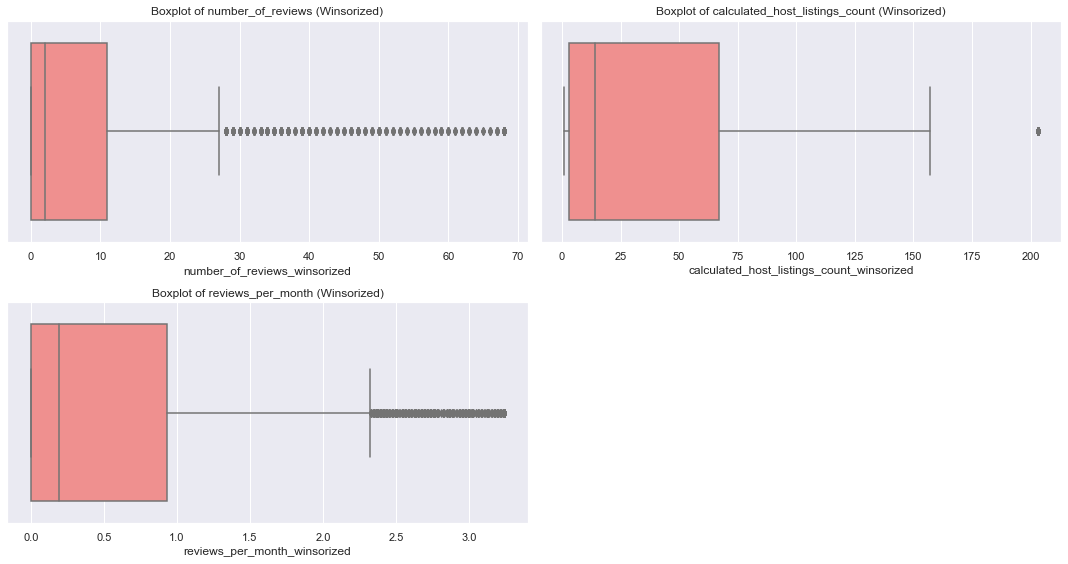

In [119]:
from scipy.stats.mstats import winsorize

def winsorize_outliers(df, variable, lower_limit, upper_limit):
    winsorized_values = winsorize(df[variable], limits=(lower_limit, upper_limit))
    df[variable+'_winsorized'] = winsorized_values
    return df

# Variables to process
variables_to_process = ['number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month']

# Set the winsorization limits
lower_limit = 0.05  # Adjust as needed
upper_limit = 0.05 # Adjust as needed

# Apply winsorization to each variable
for variable in variables_to_process:
    cendf = winsorize_outliers(cendf, variable, lower_limit, upper_limit)

# Plot boxplots after winsorization
plt.figure(figsize=(15, 8))
for i, variable in enumerate(variables_to_process, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(cendf[variable+'_winsorized'],palette = 'spring')
    plt.title(f'Boxplot of {variable} (Winsorized)')

plt.tight_layout()
plt.show()

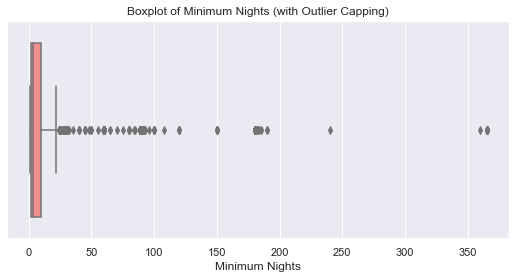

In [120]:
#Outlier Capping 
# Assuming df is your DataFrame and 'minimum_nights' is the column you want to cap
threshold = 365
plt.figure(figsize=(9, 4))
# Capping minimum nights at the specified threshold
cendf['minimum_nights'] = cendf['minimum_nights'].apply(lambda x: threshold if x > threshold else x)
sns.boxplot(x=cendf['minimum_nights'],palette = 'spring')
plt.title('Boxplot of Minimum Nights (with Outlier Capping)')
plt.xlabel('Minimum Nights')
plt.show()

### Data Transformation

In [121]:
yjt = YeoJohnsonTransformer(variables = ['number_of_reviews', 'minimum_nights', 'calculated_host_listings_count', 'reviews_per_month','availability_365'])
yjt.fit(cendf)
yjt.transform(cendf)


id                                               name    host_id  \
1        50646                    Pleasant Room along Bukit Timah     227796   
10      275343  Conveniently located City Room!( (Phone number...    1439258   
11      275344              15 mins to Outram MRT Single Room (B)    1439258   
13      294281                     5 mins walk from Newton subway    1521514   
14      324945                 20 Mins to Sentosa @ Hilltop ! (8)    1439258   
...        ...                                                ...        ...   
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

          host_name neighbourhood  latitude  longitude        room_type  \
1           Sujatha   Bukit Timah   1.33235  103.78521     Private room   
10    K2 Guesthouse   Bukit Merah   1.28875  103.80814     Private room   
11    K2 Guesthouse   Bukit Merah   1.28837  103.81099     Private room   
13        Elizabeth        Newton   1.31125  103.83816     Private room   
14    K2 Guesthouse   Bukit Merah   1.28976  103.80896     Private room   
...             ...           ...       ...        ...              ...   
7902          Belle    Queenstown   1.27973  103.78751  Entire home/apt   
7903           Neha       Tanglin   1.29269  103.82623  Entire home/apt   
7904          Mindy       Kallang   1.31286  103.85996     Private room   
7905          Huang  River Valley   1.29543  103.83801     Private room   
7906        Terence  River Valley   1.29672  103.83325     Private room   

      price  minimum_nights  ...  last_review reviews_per_month  \
1        81        1.620759  ...   2014-12-26          0.202445   
10       44        1.393475  ...   2019-04-21          0.175126   
11       40        1.507005  ...   2018-09-13          0.095802   
13       65        0.816553  ...   2019-08-22          0.455974   
14       44        1.507005  ...   2019-02-02          0.124701   
...     ...             ...  ...          ...               ...   
7902    100        0.958442  ...          NaT         -0.000000   
7903    550        1.175935  ...          NaT         -0.000000   
7904     58        1.507005  ...          NaT         -0.000000   
7905     56        1.379931  ...          NaT         -0.000000   
7906     65        1.620759  ...          NaT         -0.000000   

      calculated_host_listings_count  availability_365  Price Range  \
1                           0.680497         48.329926       51-100   
10                          3.189983         45.636140         0-50   
11                          3.189983         41.010605         0-50   
13                          1.848384         46.039536       51-100   
14                          3.189983         46.360389         0-50   
...                              ...               ...          ...   
7902                        3.164424         16.543683      101-150   
7903                        3.238741         48.329926     501-1000   
7904                        1.336309         31.098907       51-100   
7905                        1.067061         10.594674       51-100   
7906                        1.968331         48.329926       51-100   

     review_year  review_month  number_of_reviews_winsorized  \
1         2014.0        2014.0                            18   
10        2019.0        2019.0                            18   
11        2018.0        2018.0                            10   
13        2019.0        2019.0                            68   
14        2019.0        2019.0                            13   
...          ...           ...                           ...   
7902         0.0           0.0              

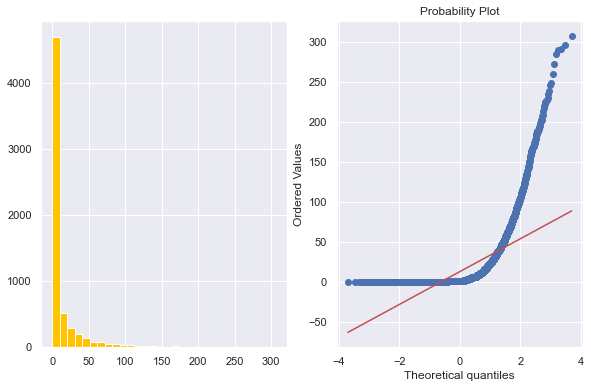

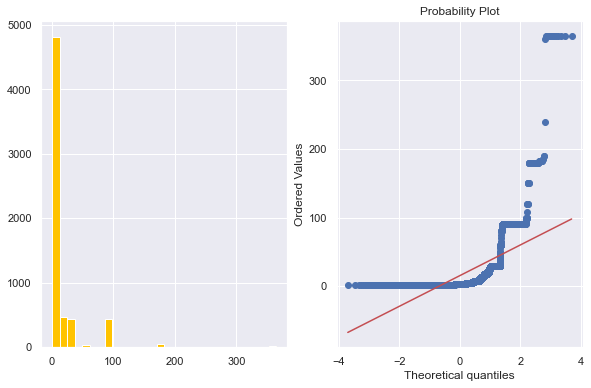

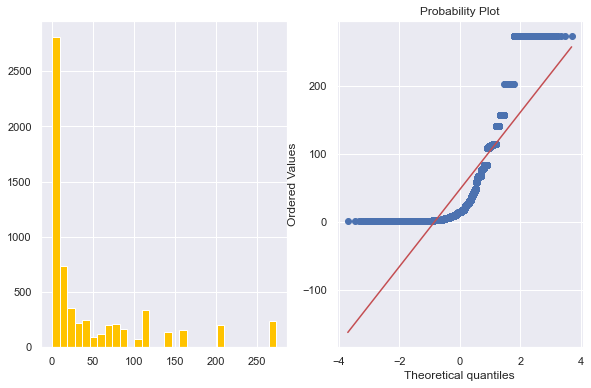

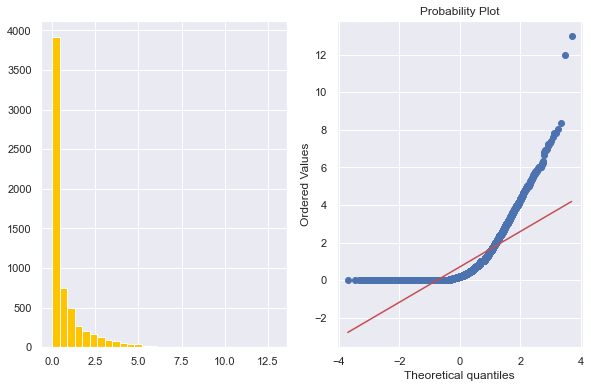

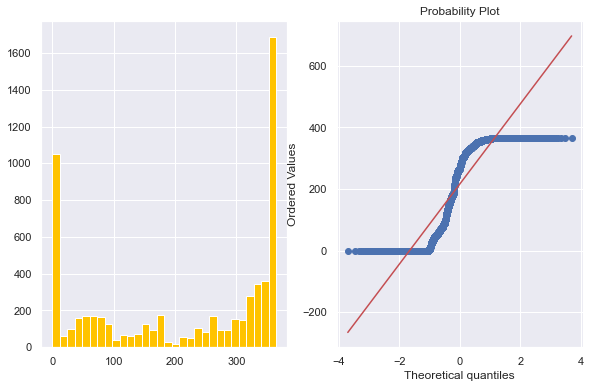

In [122]:
# Assuming diagnostic_plots is defined

# Variables to process
variables_to_process = ['number_of_reviews', 'minimum_nights', 'calculated_host_listings_count' ,'reviews_per_month','availability_365']

# Loop through variables and call diagnostic_plots
for variable in variables_to_process:
    diagnostic_plots(cendf, variable)
    plt.show()  # This ensures that each plot is displayed separately


### Categorical Variables Encoding

In [123]:
#Ordered Ordinal Encoding of Room Type Based on Room Size
roomtype_mapping = {'Entire home/apt': 3, "Private room": 2, "Shared room": 1}

# Apply the custom ordinal encoding
cendf['room_type'] = cendf['room_type'].map(roomtype_mapping)

In [124]:
#Mapping of individual neighbourhood
neighbourhood_mapping = {
    'Bukit Timah': 0,
    'Bukit Merah': 1,
    'Newton': 2,
    'Geylang': 3,
    'River Valley': 4,
    'Rochor': 5,
    'Queenstown': 6,
    'Marine Parade': 7,
    'Toa Payoh': 8,
    'Outram': 9,
    'Tanglin': 10,
    'Kallang': 11,
    'Novena': 12,
    'Downtown Core': 13,
    'Singapore River': 14,
    'Orchard': 15,
    'Museum': 16,
    'Bishan': 17,
    'Southern Islands': 18,
    'Marina South': 19
}

# Create a new column 'neighbourhood_encoded' based on the mapping
cendf['neighbourhood_encoded'] = cendf['neighbourhood'].map(neighbourhood_mapping)

# Print the mapping dictionary
print(neighbourhood_mapping)



{'Bukit Timah': 0, 'Bukit Merah': 1, 'Newton': 2, 'Geylang': 3, 'River Valley': 4, 'Rochor': 5, 'Queenstown': 6, 'Marine Parade': 7, 'Toa Payoh': 8, 'Outram': 9, 'Tanglin': 10, 'Kallang': 11, 'Novena': 12, 'Downtown Core': 13, 'Singapore River': 14, 'Orchard': 15, 'Museum': 16, 'Bishan': 17, 'Southern Islands': 18, 'Marina South': 19}


In [125]:
### Longtitude and Latitude K- Means 
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'cendf' is your DataFrame
location_data = cendf[['latitude', 'longitude']]

# Use K-Means clustering to create location clusters
kmeans = KMeans(n_clusters=20, random_state=42)
cendf['location_cluster'] = kmeans.fit_predict(location_data)

# Check the distribution of location clusters
print(cendf['location_cluster'].value_counts())




1     857
2     673
18    562
6     549
0     489
9     460
4     398
14    363
8     360
17    324
13    286
11    234
15    191
7     103
16     98
10     94
3      90
5      72
12     52
19     52
Name: location_cluster, dtype: int64


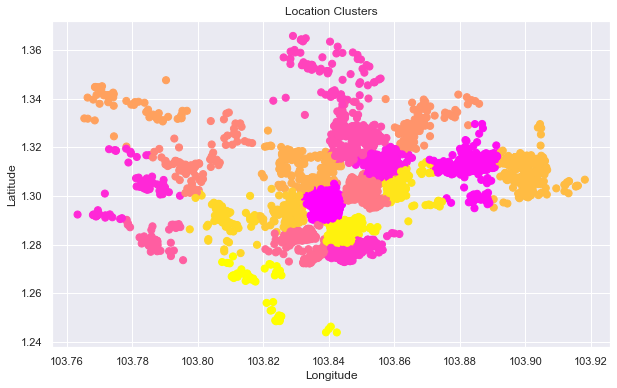

In [126]:
# Scatter plot of longitude and latitude colored by clusters
plt.figure(figsize=(10, 6))
plt.scatter(cendf['longitude'], cendf['latitude'], c=cendf['location_cluster'], cmap='spring', s=50)
plt.title('Location Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Numerical Variable Discretization

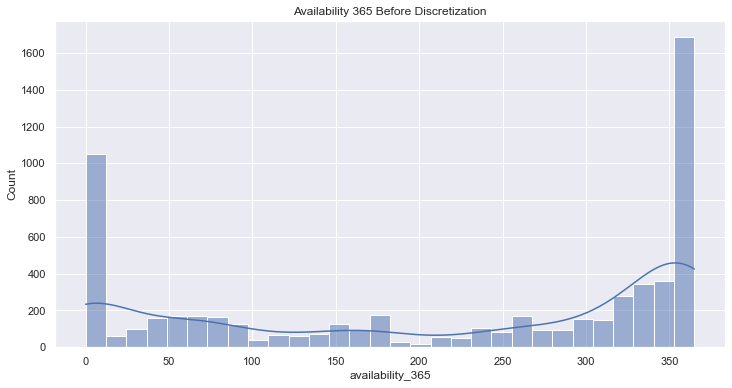

In [127]:
# Plot histograms for availability_365 before and after discretization
plt.figure(figsize=(12, 6))

sns.histplot(cendf['availability_365'], bins=30, kde=True)
plt.title('Availability 365 Before Discretization')

plt.show()

In [128]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['availability_365'])
disc.fit(cendf)
disc.transform(cendf)

id                                               name    host_id  \
1        50646                    Pleasant Room along Bukit Timah     227796   
10      275343  Conveniently located City Room!( (Phone number...    1439258   
11      275344              15 mins to Outram MRT Single Room (B)    1439258   
13      294281                     5 mins walk from Newton subway    1521514   
14      324945                 20 Mins to Sentosa @ Hilltop ! (8)    1439258   
...        ...                                                ...        ...   
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

          host_name neighbourhood  latitude  longitude  room_type  price  \
1           Sujatha   Bukit Timah   1.33235  103.78521          2     81   
10    K2 Guesthouse   Bukit Merah   1.28875  103.80814          2     44   
11    K2 Guesthouse   Bukit Merah   1.28837  103.81099          2     40   
13        Elizabeth        Newton   1.31125  103.83816          2     65   
14    K2 Guesthouse   Bukit Merah   1.28976  103.80896          2     44   
...             ...           ...       ...        ...        ...    ...   
7902          Belle    Queenstown   1.27973  103.78751          3    100   
7903           Neha       Tanglin   1.29269  103.82623          3    550   
7904          Mindy       Kallang   1.31286  103.85996          2     58   
7905          Huang  River Valley   1.29543  103.83801          2     56   
7906        Terence  River Valley   1.29672  103.83325          2     65   

      minimum_nights  ...  calculated_host_listings_count availability_365  \
1                 90  ...                               1                7   
10                15  ...                              32                5   
11                30  ...                              32                4   
13                 2  ...                               6                5   
14                30  ...                              32                5   
...              ...  ...                             ...              ...   
7902               3  ...                              31                1   
7903               6  ...                              34                7   
7904              30  ...                               3                2   
7905              14  ...                               2                0   
7906              90  ...                               7                7   

      Price Range  review_year  review_month number_of_reviews_winsorized  \
1          51-100       2014.0        2014.0                           18   
10           0-50       2019.0        2019.0                           18   
11           0-50       2018.0        2018.0                           10   
13         51-100       2019.0        2019.0                           68   
14           0-50       2019.0        2019.0                           13   
...           ...          ...           ...                          ...   
7902      101-150          0.0           0.0                            0   
7903     501-1000          0.0           0.0                            0   
7904       51-100          0.0           0.0                            0   
7905       51-100          0.0           0.0                            0   
7906       51-100          0.0           0.0                            0   

      calculated_host_listings_count_winsorized  reviews_per_month_winsorized  \
1                                             1                          0.28   
10                                           32                          0.23   
11                               

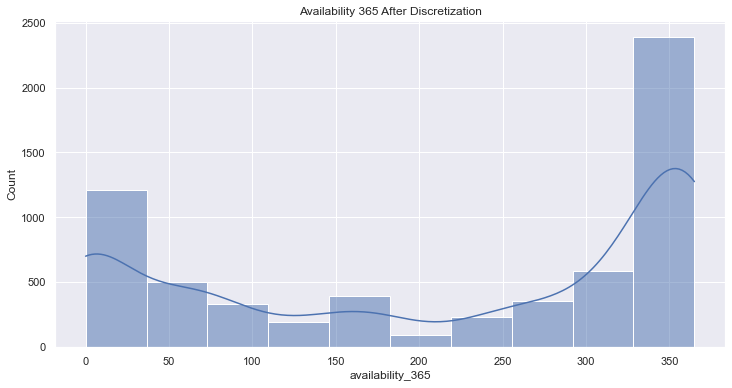

In [129]:
plt.figure(figsize=(12, 6))
sns.histplot(cendf['availability_365'], bins=10, kde=True)
plt.title('Availability 365 After Discretization')
plt.show()

### Feature Scaling

In [130]:
# Separate 'price' from listing_data_new
price_column = cendf['price']
cendf = cendf.drop(columns=['price'])

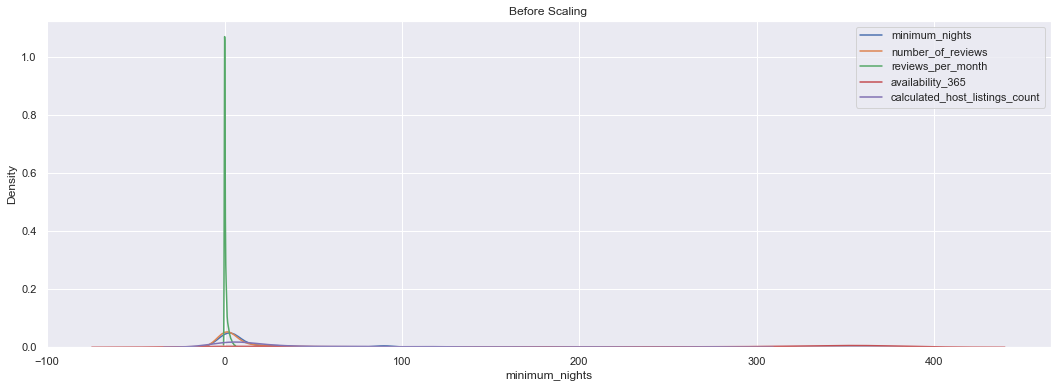

In [131]:
fig, ax = plt.subplots(figsize=(18, 6))

# before scaling
ax.set_title('Before Scaling')
sns.kdeplot(cendf['minimum_nights'], ax=ax, label ='minimum_nights')
sns.kdeplot(cendf['number_of_reviews'], ax=ax, label ='number_of_reviews')
sns.kdeplot(cendf['reviews_per_month'], ax=ax, label ='reviews_per_month')
sns.kdeplot(cendf['availability_365'], ax=ax, label ='availability_365')
sns.kdeplot(cendf['calculated_host_listings_count'], ax=ax, label ='calculated_host_listings_count')
ax.legend()

In [132]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# extract only the numerical columns for scaling
numerical_columns = cendf.select_dtypes(include=['int64', 'float64']).columns

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(cendf[numerical_columns])
scaler_maxabs.fit(cendf[numerical_columns])

# transform train and test sets
cendf[numerical_columns] = scaler_maxabs.transform(scaler_mean.transform(cendf[numerical_columns]))

C:\Users\huohe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


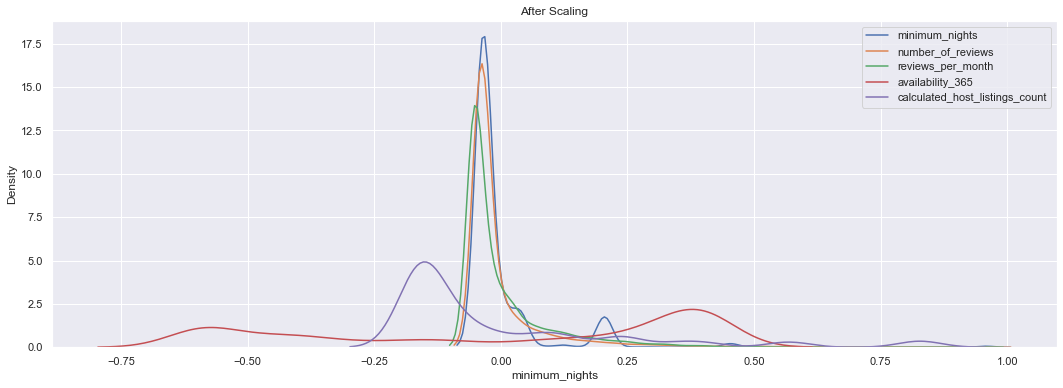

In [133]:
fig, ax = plt.subplots(figsize=(18, 6))

# after scaling
ax.set_title('After Scaling')
sns.kdeplot(cendf['minimum_nights'], ax=ax, label ='minimum_nights')
sns.kdeplot(cendf['number_of_reviews'], ax=ax, label ='number_of_reviews')
sns.kdeplot(cendf['reviews_per_month'], ax=ax, label ='reviews_per_month')
sns.kdeplot(cendf['availability_365'], ax=ax, label ='availability_365')
sns.kdeplot(cendf['calculated_host_listings_count'], ax=ax, label ='calculated_host_listings_count')
ax.legend()

In [134]:
# Add the 'price' column back to listing_data_new
cendf['price'] = price_column

### 2.3 Correlation Analysis

In [135]:
# Assuming 'cendf' is your DataFrame
data_types = cendf.dtypes

# Display the data types
print(data_types)


id                                                  float64
name                                                 object
host_id                                             float64
host_name                                            object
neighbourhood                                        object
latitude                                            float64
longitude                                           float64
room_type                                           float64
minimum_nights                                      float64
number_of_reviews                                   float64
last_review                                  datetime64[ns]
reviews_per_month                                   float64
calculated_host_listings_count                      float64
availability_365                                    float64
Price Range                                        category
review_year                                         float64
review_month                            

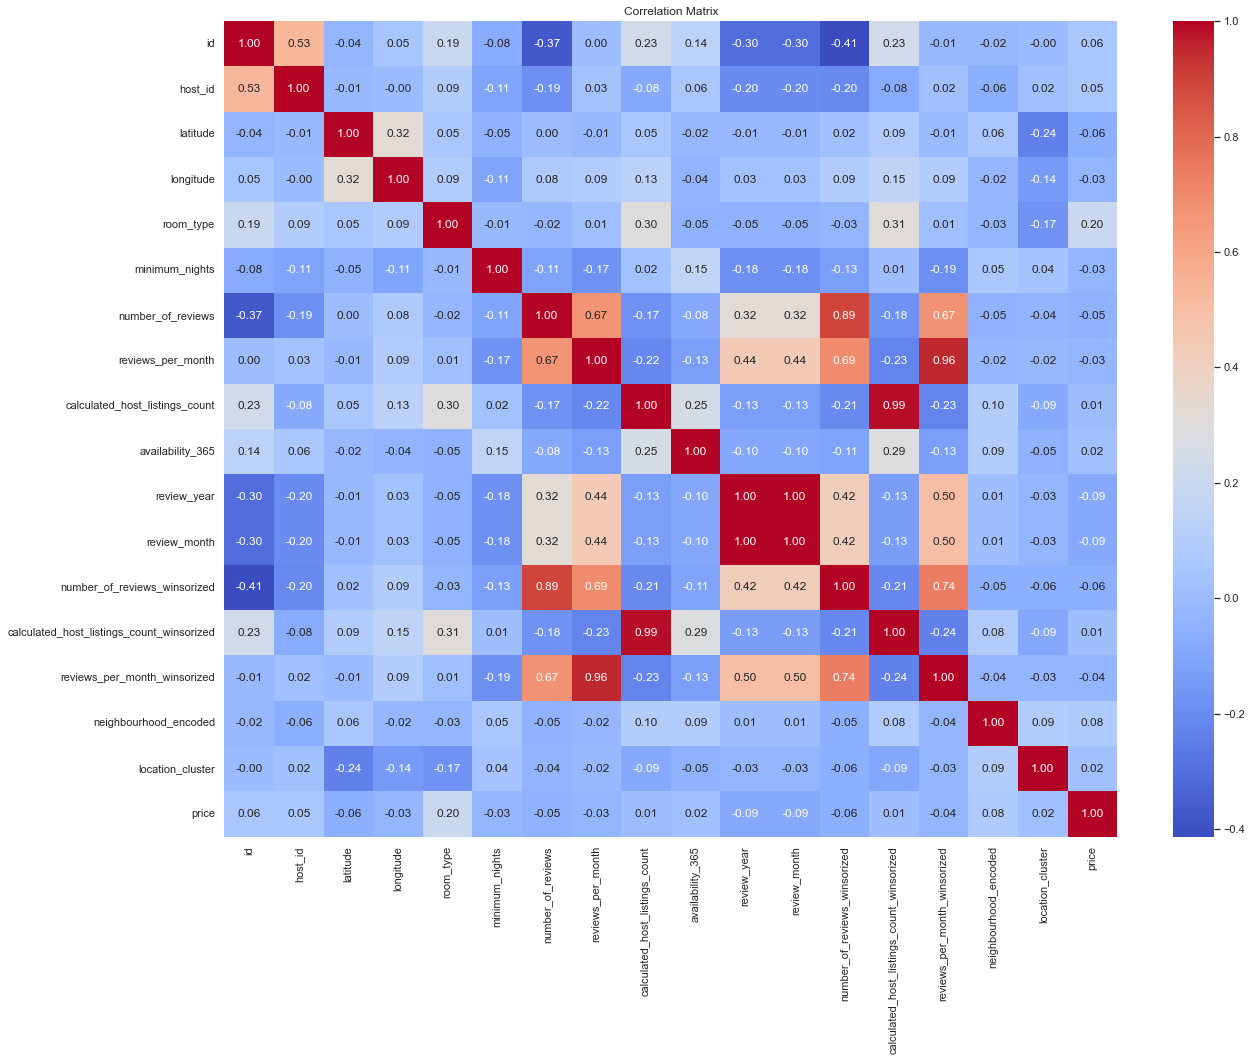

In [136]:
correlation_matrix = cendf.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [137]:
# Set a threshold for high correlation
threshold = 0.2  # Adjust the threshold as needed

# Filter variables with correlation greater than the threshold with 'is_promoted'
high_correlation_vars = correlation_matrix.loc['price'][abs(correlation_matrix.loc['price']) > threshold].index.tolist()

# Remove 'is_promoted' itself from the list (since it will have a perfect correlation of 1)
high_correlation_vars.remove('price')

# Print out the variables
print("Variables with high correlation to 'price':")
print(high_correlation_vars)

Variables with high correlation to 'price':
[]


In [138]:
low_correlation_vars = correlation_matrix.loc['price'][(correlation_matrix.loc['price'] < 0.1) & (correlation_matrix.loc['price'] > 0)].index.tolist()

# Print out the variables
print("Variables with correlation between 0 and 0.2 with 'price':")
print(low_correlation_vars)

Variables with correlation between 0 and 0.2 with 'price':
['id', 'host_id', 'calculated_host_listings_count', 'availability_365', 'calculated_host_listings_count_winsorized', 'neighbourhood_encoded', 'location_cluster']


In [139]:
negative_correlation_vars = correlation_matrix.loc['price'][correlation_matrix.loc['price'] < 0].index.tolist()

# Print out the variables
print("Variables with negative correlation with 'price':")
print(negative_correlation_vars)


Variables with negative correlation with 'price':
['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_year', 'review_month', 'number_of_reviews_winsorized', 'reviews_per_month_winsorized']


In [140]:
# Use Stats Model to evaluate the p-value of each coefficient

features = cendf.drop(['price'], axis=1)
features = features.select_dtypes(include=['number'])
import statsmodels.api as sm

# Add a constant term to the independent variables matrix
features = sm.add_constant(features)

# Fit the OLS regression model
model = sm.OLS(cendf['price'], features).fit()

# Display the summary
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     29.86
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           5.69e-88
Time:                        23:30:03   Log-Likelihood:                -44564.
No. Observations:                6307   AIC:                         8.916e+04
Df Residuals:                    6290   BIC:                         8.928e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       165.6328      6.017     27.530      0.000     153.838     177.427
id                                          -46.5921     21.600     -2.157      0.031     -88.936      -4.248
host_id                                       4.5546     15.181      0.300      0.764     -25.205      34.314
latitude                                  -1575.2565    329.368     -4.783      0.000   -2220.930    -929.583
longitude                                 -1.141e+04   1.61e+04     -0.707      0.479    -4.3e+04    2.02e+04
room_type                                   350.4244     19.660     17.824      0.000     311.884     388.965
minimum_nights                             -205.0780     41.659     -4.923      0.000    -286.743    -123.413
number_of_reviews                             2.3879     86.805      0.028      0.978    -167.779     172.555
reviews_per_month                            34.0366    141.738      0.240      0.810    -243.817     311.891
calculated_host_listings_count             -128.3663     90.772     -1.414      0.157    -306.311      49.578
availability_365                             36.6720     10.227      3.586      0.000      16.624      56.720
review_year                                 -29.1193      4.888     -5.957      0.000     -38.701     -19.537
review_month                                -29.1193      4.888     -5.957      0.000     -38.701     -19.537
number_of_reviews_winsorized                -75.9464     35.521     -2.138      0.033    -145.579      -6.314
calculated_host_listings_count_winsorized    21.7948     78.056      0.279      0.780    -131.221     174.811
reviews_per_month_winsorized                 27.6280     49.703      0.556      0.578     -69.806     125.062
neighbourhood_encoded                       116.3010     15.659      7.427      0.000      85.604     146.999
location_cluster                              1.3953      0.617      2.260      0.024       0.185       2.606
==============================================================================
Omnibus:                    14111.104   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         89314689.718
Skew:                          20.864   Prob(JB):                         0.00
Kurtosis:                     584.487   Cond. No.                     5.43e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


Low P-value (typically ≤ 0.05):

If the p-value is very small (commonly less than or equal to 0.05), it suggests that there is enough evidence to reject the null hypothesis.
Rejecting the null hypothesis indicates that the variable is likely to have a statistically significant impact on the target variable.

High P-value (> 0.05):

If the p-value is high, it suggests that there isn't enough evidence to reject the null hypothesis.
Failing to reject the null hypothesis implies that the variable may not be statistically significant in predicting the target variable.

### Dropping Features

In [141]:
# # List of columns to drop
columns_to_drop = [
 'id','last_review', 'name', 'host_name', 'neighbourhood', 'Price Range', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_year', 'review_month', 'number_of_reviews_winsorized', 'minimum_nights', 'reviews_per_month_winsorized'
]

# Drop specified columns from the features (X)
cendf.drop(columns=columns_to_drop, axis=1, inplace = True)



### Final Dataset

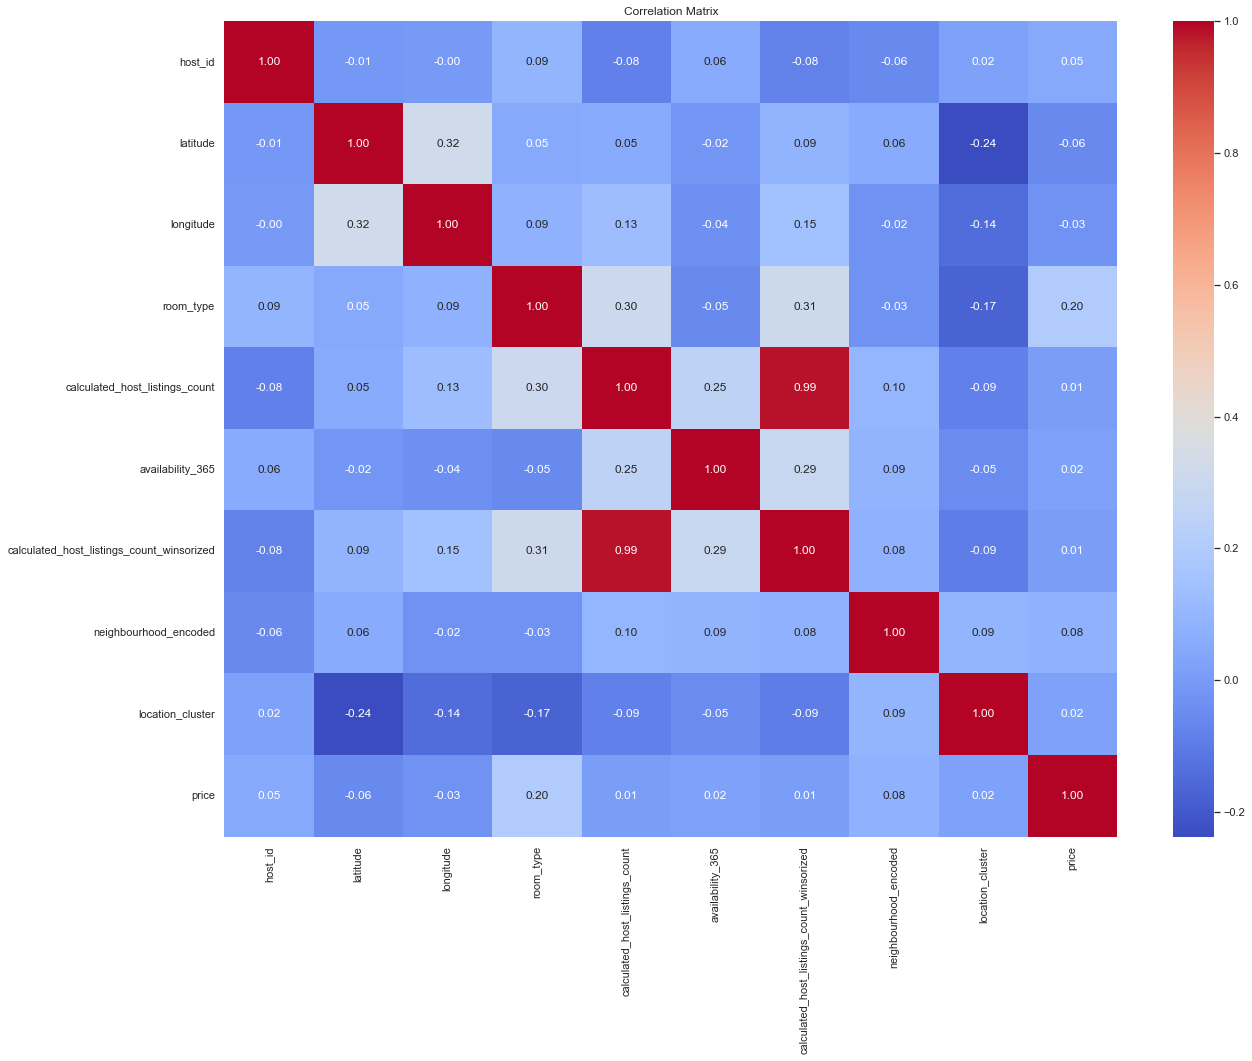

In [142]:
correlation_matrix = cendf.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 2.4 Export the data

In [143]:
cendf.to_csv("centraldata.csv", index = False)
cen = pd.read_csv("centraldata.csv")
print(cen.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   host_id                                    6307 non-null   float64
 1   latitude                                   6307 non-null   float64
 2   longitude                                  6307 non-null   float64
 3   room_type                                  6307 non-null   float64
 4   calculated_host_listings_count             6307 non-null   float64
 5   availability_365                           6307 non-null   float64
 6   calculated_host_listings_count_winsorized  6307 non-null   float64
 7   neighbourhood_encoded                      6307 non-null   float64
 8   location_cluster                           6307 non-null   int64  
 9   price                                      6307 non-null   int64  
dtypes: float64(8), int64(2)
